In [617]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime, timedelta
import datetime as dt
import pandas as pd
import plotly.express as px
import seaborn as sns
import random
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from lifelines import KaplanMeierFitter
from datetime import date
from lifelines.utils import median_survival_times
from sklearn.feature_selection import VarianceThreshold
from lifelines import CoxPHFitter
from sklearn.preprocessing import LabelEncoder
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from numpy.lib.recfunctions import rename_fields
from sksurv.ensemble import RandomSurvivalForest
from sklearn.model_selection import train_test_split
from sksurv.datasets import load_breast_cancer
from sksurv.ensemble import ComponentwiseGradientBoostingSurvivalAnalysis
from sksurv.ensemble import GradientBoostingSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder
from tqdm import tqdm
from sklearn import set_config
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sksurv.column import encode_categorical
from sksurv.metrics import concordance_index_censored
from sksurv.svm import FastSurvivalSVM
import warnings

In [618]:
!pip list

Package                       Version


----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astor                         0.8.1
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
autograd                      1.5
autograd-gamma                0.5.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryorn

In [619]:
#DATA EXPLORATION AND CLEANING

In [735]:
#upload current version of the file
df = pd.read_excel('ew_4.xlsx')

In [736]:
df

,Medewerker,Leeftijd,Geslacht,Nationaliteit,Datum_in_dienst,Datum_uit_dienst,Jaar uit dienst,Werkgever,pso,Functie_omschrijving,Type_functie_omschrijving,Regio,Rayon,Project,Segment,reden_einde_dienstverband,Branchedatum,Dagen in dienst,Branche jaren,Urenresultaat,Productiviteit,Verzuim,MKS,%UZK,Verloop,Overuren,Aantal projecten,SVS,Aantal ziek,Uurloon,Regeling,Contract,Uren/wk,Min. uren/wk,Max. uren/wk,Andere werkgever,Uren p/w andere werkgever,Volg je een opleiding,Uren p/w opleiding,Spaaruren D-deel,Reden indiensttreding,Traject MDP,VAST-VAR uren,Introductie afgerond,Aantal beoordelingen
0,37,55,Vrouw,Nederlandse,1995-10-02,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,1995-10-02,10075,27.602740,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,1,14.58,0.0,Onbepaalde tijd,30.0,0.0,0.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0
1,38,58,Vrouw,Nederlandse,1999-03-27,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,1999-03-27,8803,24.117808,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,0,13.87,0.0,Onbepaalde tijd,10.0,0.0,0.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0
2,40,45,Vrouw,Nederlandse,2001-08-21,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,2001-08-21,7925,21.712329,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,0,13.87,0.0,Onbepaalde tijd,25.0,0.0,0.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0
3,46,54,Vrouw,Nederlandse,2000-01-03,NaT,NaN,98,NaN,Housekeeper (3.1),Loonschaal 5,Regio Amsterdam,Rayon 105,13002,Hotels,NaN,2000-01-03,8521,23.345205,-0.072,0.690,0.0498,8.71,0.3589,0.531,2.0,2,1,3,16.64,0.0,Onbepaalde tijd,38.0,0.0,0.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,1
4,49,64,Vrouw,Nederlandse,2000-08-09,NaT,NaN,98,NaN,Schoonmaakmedewerker Hotel,Loonschaal 1,Regio Amsterdam,Rayon 100,1000,Hotels,NaN,2000-08-09,8302,22.745205,0.136,0.635,0.0653,7.47,0.1951,0.534,0.0,1,0,4,13.87,0.0,Onbepaalde tijd,25.0,0.0,0.0,Nee,0.0,Nee,0.0,1,0,N,Vast,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,9207678,34,Vrouw,Roemeense,2020-02-10,2020-09-10,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 499,80037,Hotels,Einde van rechtswege,2020-02-10,1178,3.227397,-0.347,0.000,0.0794,0.00,0.0000,0.000,0.0,1,0,0,11.27,0.0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0
10282,9207679,49,Vrouw,Egyptische,2021-09-29,NaT,NaN,98,N.v.t.,Schoonmaakmedewerker Hotel,Loonschaal 1,Regio Zuid-West,Rayon 402,80135,Hotels,NaN,2021-09-29,581,1.591781,0.121,1.062,0.1462,9.80,0.0000,0.125,0.0,1,0,0,12.58,0.0,Onbepaalde tijd,9.0,0.0,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Vast,N,0
10283,9207685,55,Vrouw,Portugese,2020-02-10,2020-09-10,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 406,80058,Hotels,Einde van rechtswege,2020-02-10,1178,3.227397,0.377,0.912,0.0144,0.00,0.0000,0.000,0.0,3,0,0,11.27,0.0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0
10284,9207692,28,Man,Nederlandse,2020-02-15,2020-07-31,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 406,80023,Hotels,EV - Andere baan,2020-02-15,1173,3.213699,0.100,0.842,0.0290,0.00,0.0000,4.000,0.0,1,0,0,11.27,0.0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0


In [737]:
print(df.describe())


         Medewerker      Leeftijd  Jaar uit dienst     Werkgever  \
count  1.028600e+04  10286.000000      7239.000000  10286.000000   
mean   1.064036e+06     38.234202      2021.357922     97.298853   
std    2.713918e+06     13.883545         0.994710      5.424206   
min    3.700000e+01      2.000000      2020.000000     14.000000   
25%    1.366025e+04     26.000000      2020.000000     98.000000   
50%    2.114105e+05     37.000000      2021.000000     98.000000   
75%    2.169718e+05     49.000000      2022.000000     98.000000   
max    9.207724e+06     73.000000      2023.000000     98.000000   

            Project  Dagen in dienst  Branche jaren  Urenresultaat  \
count  1.028600e+04     10286.000000   10286.000000   10286.000000   
mean   4.248863e+04      1114.442738       3.984756      -0.102518   
std    4.141124e+05      1306.242806       5.469143       1.017428   
min    1.000000e+03       -32.000000      -0.087671     -91.368000   
25%    1.694000e+03       329.000000 

In [738]:
print(df.isnull().sum())
# NAs with employees that did not quit - this is correct and will be adjusted accordingly depending on the model

Medewerker                      0
Leeftijd                        0
Geslacht                        0
Nationaliteit                   0
Datum_in_dienst                 0
Datum_uit_dienst             3047
Jaar uit dienst              3047
Werkgever                       0
pso                          3414
Functie_omschrijving            0
Type_functie_omschrijving       0
Regio                           0
Rayon                           0
Project                         0
Segment                         0
reden_einde_dienstverband    3293
Branchedatum                    0
Dagen in dienst                 0
Branche jaren                   0
Urenresultaat                   0
Productiviteit                  0
Verzuim                         0
MKS                             0
%UZK                            0
Verloop                         0
Overuren                        0
Aantal projecten                0
SVS                             0
Aantal ziek                     0
Uurloon       

In [739]:
#dropping redundant columns with null values or correlated
df = df.drop(['pso', 'Rayon','Type_functie_omschrijving'], axis=1)

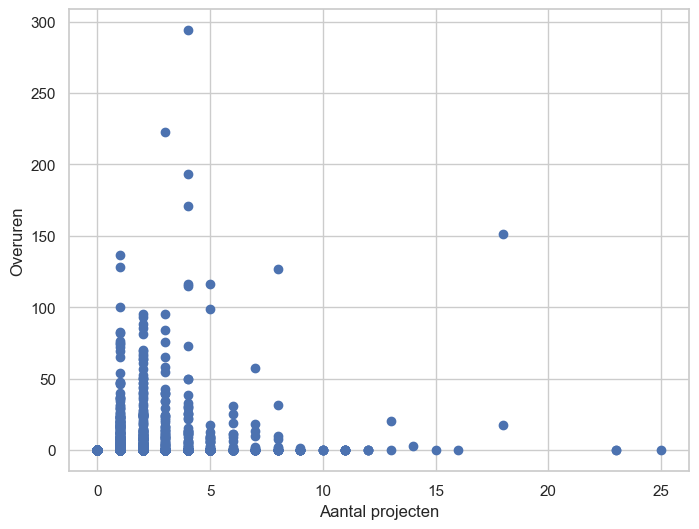

In [740]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df['Aantal projecten'], df['Overuren'])
plt.xlabel('Aantal projecten')
plt.ylabel('Overuren')
plt.show()


In [741]:
#Rename the columns in the DataFrame (translation to English)
df = df.rename(columns={'Medewerker':'Employee', 'Leeftijd':'Age', 'Geslacht': 'Gender', 'Nationaliteit':'Nationality',
       'Datum_in_dienst':'Start_date', 'Datum_uit_dienst':'End_date', 'Werkgever':'Employer',
       'Functie_omschrijving':'Job_description', 'Regio':'Region', 
       'reden_einde_dienstverband':'reason_end_employment', 'Branchedatum':'Industry_date', 'Dagen in dienst':'Days_in_employment',
       'Urenresultaat':'Hour_result', 'Productiviteit':'Productivity', 'Verzuim':'Absenteeism', 'Verloop':'Attrition',
       'Overuren':'Overtime', 'Aantal projecten':'Number_of_projects', 'Aantal ziek':'Number_sick', 'Uurloon':'Hourly_pay',
       'Regeling':'Scheme',  'Uren/wk':'Hours_contract', 'Andere werkgever':'Another_employer',
       'Uren p/w andere werkgever':'Hours_other_employer', 'Volg je een opleiding':'Training', 'Uren p/w opleiding':'Hours_in_training',
       'Spaaruren D-deel':'Save_hours_D-part', 'Reden indiensttreding':'Reason_for_joining', 'Traject MDP':'Pathway MDP',
       'VAST-VAR uren':'VAST-VAR hours', 'Introductie afgerond':'Introduction completed', 'Aantal beoordelingen': 'Number_of_assessments'})


print(df.columns)


Index(['Employee', 'Age', 'Gender', 'Nationality', 'Start_date', 'End_date',
       'Jaar uit dienst', 'Employer', 'Job_description', 'Region', 'Project',
       'Segment', 'reason_end_employment', 'Industry_date',
       'Days_in_employment', 'Branche jaren', 'Hour_result', 'Productivity',
       'Absenteeism', 'MKS', '%UZK', 'Attrition', 'Overtime',
       'Number_of_projects', 'SVS', 'Number_sick', 'Hourly_pay', 'Scheme',
       'Contract', 'Hours_contract', 'Min. uren/wk', 'Max. uren/wk',
       'Another_employer', 'Hours_other_employer', 'Training',
       'Hours_in_training', 'Save_hours_D-part', 'Reason_for_joining',
       'Pathway MDP', 'VAST-VAR hours', 'Introduction completed',
       'Number_of_assessments'],
      dtype='object')


In [742]:
corr_matrix = df.corr()

rank = np.linalg.matrix_rank(corr_matrix)

print(f"Rank of correlation matrix: {rank}")
print(f"Number of columns in DataFrame: {df.shape[1]}")
#checking if rank>columns

Rank of correlation matrix: 0
Number of columns in DataFrame: 42


C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\812654427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


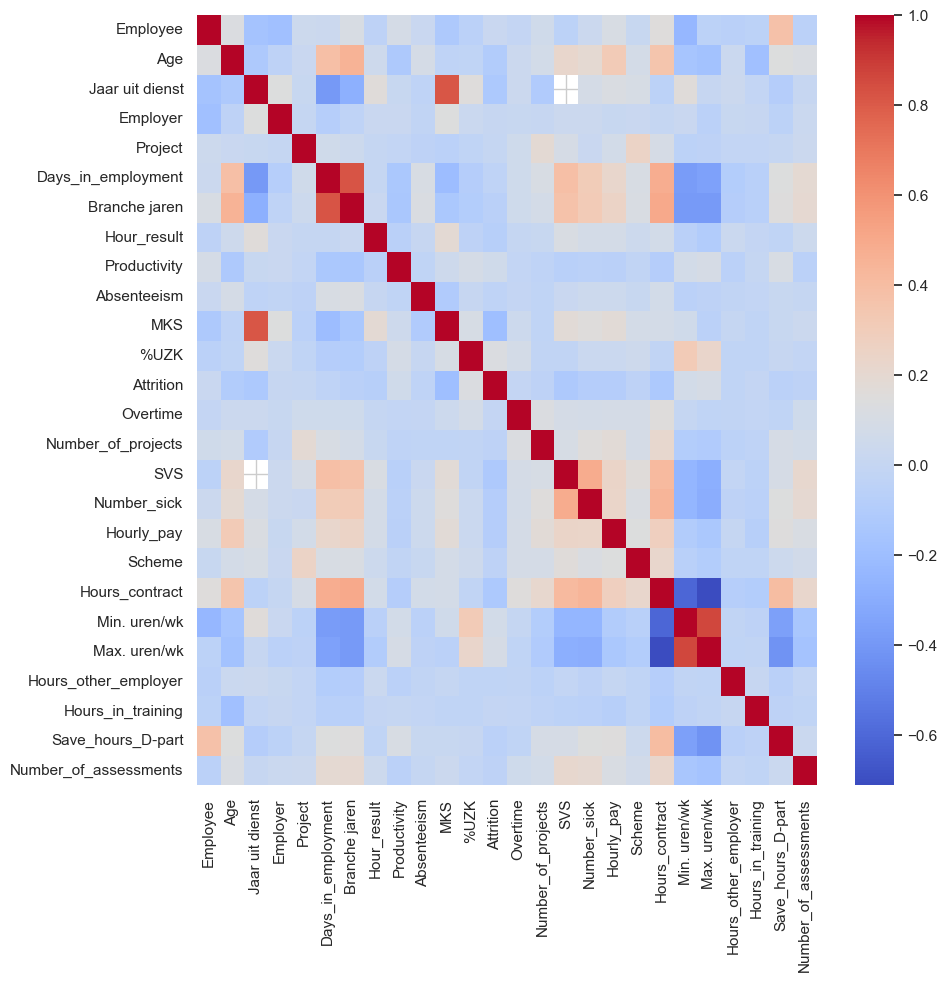

In [743]:
#correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [744]:
corr_matrix

,Employee,Age,Jaar uit dienst,Employer,Project,Days_in_employment,Branche jaren,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Min. uren/wk,Max. uren/wk,Hours_other_employer,Hours_in_training,Save_hours_D-part,Number_of_assessments
Employee,1.000000,0.130456,-0.163726,-0.184676,0.038628,0.032634,0.104297,-0.040992,0.088632,0.017055,-0.118339,-0.051937,0.018629,-0.003828,0.057813,-0.043435,0.033882,0.105897,0.010786,0.153723,-0.239831,-0.046835,-0.059653,-0.049797,0.372513,-0.053185
Age,0.130456,1.000000,-0.120581,-0.041673,0.020730,0.391339,0.452167,0.047562,-0.120092,0.089386,-0.031187,-0.029085,-0.099289,0.034683,0.075414,0.223000,0.195530,0.311998,0.078511,0.355236,-0.151416,-0.173432,0.028357,-0.185226,0.141282,0.118333
Jaar uit dienst,-0.163726,-0.120581,1.000000,0.138706,0.012915,-0.392783,-0.279029,0.163852,0.016203,-0.036341,0.813594,0.150769,-0.127086,0.030775,-0.108438,NaN,0.088826,0.121893,0.101814,-0.048545,0.158725,0.009439,0.035556,-0.015285,-0.085992,0.008725
Employer,-0.184676,-0.041673,0.138706,1.000000,-0.002028,-0.080175,-0.030445,0.018791,0.022329,-0.023183,0.140590,0.025343,0.009539,0.013100,0.007175,0.033577,0.035070,0.016137,0.017763,-0.000418,0.020007,-0.050219,0.016765,0.003590,-0.045935,0.023994
Project,0.038628,0.020730,0.012915,-0.002028,1.000000,0.060464,0.040771,0.001220,-0.013911,-0.042171,-0.055261,-0.024682,0.000003,0.054853,0.187980,0.094664,0.018675,0.074980,0.249092,0.093031,-0.043834,-0.040774,-0.013955,-0.010363,-0.003153,0.032245
Days_in_employment,0.032634,0.391339,-0.392783,-0.080175,0.060464,1.000000,0.824194,-0.002061,-0.133832,0.103992,-0.205498,-0.084270,-0.033011,0.053627,0.104686,0.389584,0.310391,0.219167,0.106523,0.480623,-0.379007,-0.353217,-0.092714,-0.066073,0.140275,0.194403
Branche jaren,0.104297,0.452167,-0.279029,-0.030445,0.040771,0.824194,1.000000,0.023553,-0.139190,0.122778,-0.131920,-0.096697,-0.062024,0.053533,0.080741,0.364919,0.312095,0.247168,0.116217,0.500635,-0.386107,-0.386919,-0.084313,-0.069957,0.144493,0.198979
Hour_result,-0.040992,0.047562,0.163852,0.018791,0.001220,-0.002061,0.023553,1.000000,-0.059350,0.007364,0.189417,-0.041306,-0.072118,0.002233,0.014923,0.116503,0.082657,0.077897,0.037941,0.071703,-0.062806,-0.098253,0.024542,-0.006611,-0.027254,0.039755
Productivity,0.088632,-0.120092,0.016203,0.022329,-0.013911,-0.133832,-0.139190,-0.059350,1.000000,-0.023745,0.046479,0.089642,0.061126,-0.010571,-0.031175,-0.069253,-0.054565,-0.061180,-0.021900,-0.090110,0.076625,0.094613,-0.056369,0.000462,0.108544,-0.053599
Absenteeism,0.017055,0.089386,-0.036341,-0.023183,-0.042171,0.103992,0.122778,0.007364,-0.023745,1.000000,-0.103818,0.004956,-0.035752,-0.003468,-0.026020,0.017791,0.037950,0.041157,0.016586,0.076445,-0.051756,-0.039699,-0.016919,-0.015113,0.016443,-0.001172


In [745]:
#highlighting variables with high correlation
high_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
pd.set_option('display.max_columns', None)
high_corr

,Employee,Age,Jaar uit dienst,Employer,Project,Days_in_employment,Branche jaren,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Min. uren/wk,Max. uren/wk,Hours_other_employer,Hours_in_training,Save_hours_D-part,Number_of_assessments
Employee,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jaar uit dienst,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.813594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employer,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Project,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Days_in_employment,NaN,NaN,NaN,NaN,NaN,1.000000,0.824194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Branche jaren,NaN,NaN,NaN,NaN,NaN,0.824194,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500635,NaN,NaN,NaN,NaN,NaN,NaN
Hour_result,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Absenteeism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [746]:
#dropping one of the correlated variables from pair 
df = df.drop(columns=['Min. uren/wk', 'Max. uren/wk', 'Branche jaren','Jaar uit dienst'], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


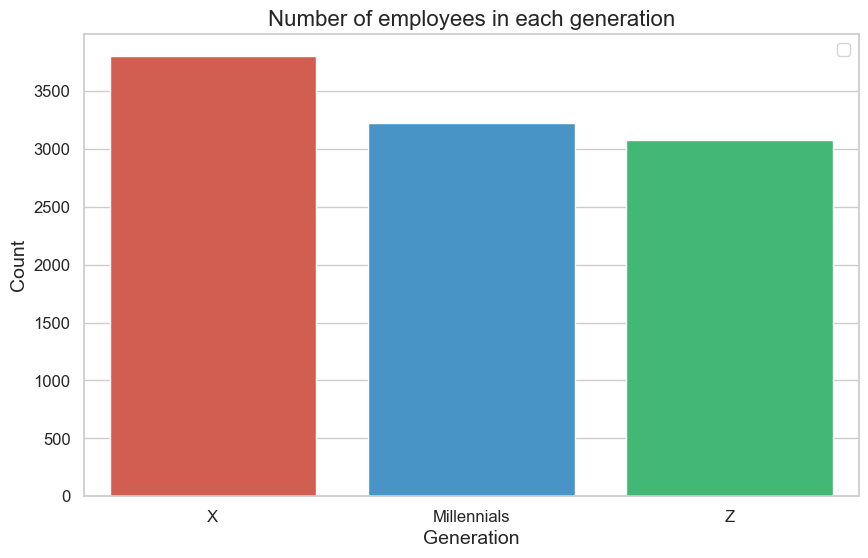

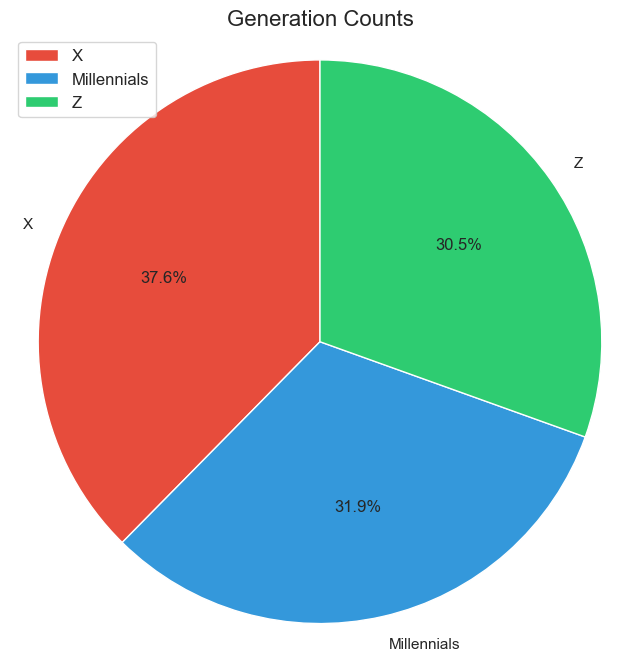

In [747]:
import matplotlib.pyplot as plt
import seaborn as sns

#Generations variable creation and plots

df = df[df['Age'] >= 18]

df['Generation'] = df['Age'].apply(lambda x: 'X' if x >= 44 else 'Millennials' if 29 <= x <= 43 else 'Z')
generation_counts = df['Generation'].value_counts()

colors = ['#E74C3C', '#3498DB', '#2ECC71']

plt.figure(figsize=(10, 6))

sns.barplot(x=generation_counts.index, y=generation_counts.values, palette=colors)
plt.title('Number of employees in each generation', fontsize=16) 
plt.xlabel('Generation', fontsize=14)  
plt.ylabel('Count', fontsize=14) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)  
plt.legend(fontsize=12)
plt.show()


plt.figure(figsize=(8, 8))  
plt.pie(generation_counts.values, labels=generation_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Generation Counts', fontsize=16)  
plt.legend(fontsize=12)
plt.axis('equal')
plt.show()

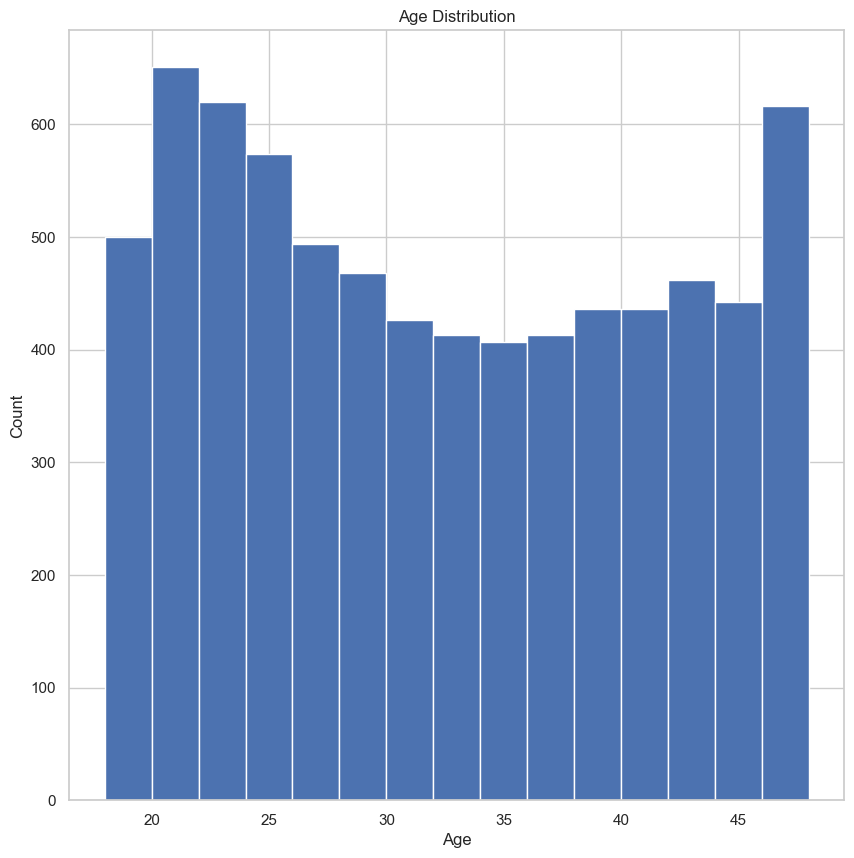

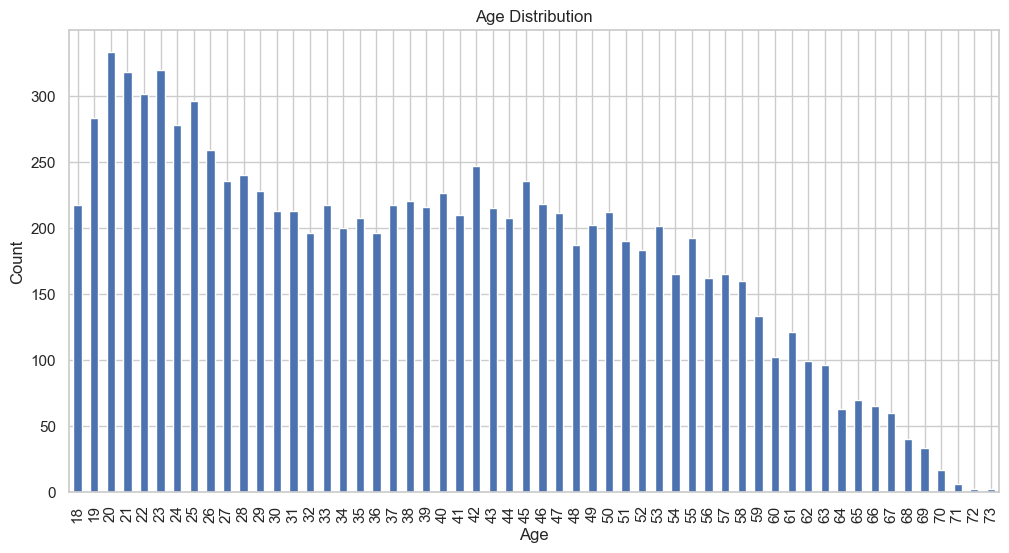

In [748]:
import matplotlib.pyplot as plt
#age distribution
age_counts = df['Age'].value_counts().sort_index()

plt.hist(df['Age'], bins=range(18, 50, 2))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
age_counts.plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [749]:
df

,Employee,Age,Gender,Nationality,Start_date,End_date,Employer,Job_description,Region,Project,Segment,reason_end_employment,Industry_date,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation
0,37,55,Vrouw,Nederlandse,1995-10-02,NaT,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,NaN,1995-10-02,10075,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,1,14.58,0.0,Onbepaalde tijd,30.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0,X
1,38,58,Vrouw,Nederlandse,1999-03-27,NaT,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,NaN,1999-03-27,8803,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,0,13.87,0.0,Onbepaalde tijd,10.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0,X
2,40,45,Vrouw,Nederlandse,2001-08-21,NaT,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,NaN,2001-08-21,7925,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,0,13.87,0.0,Onbepaalde tijd,25.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0,X
3,46,54,Vrouw,Nederlandse,2000-01-03,NaT,98,Housekeeper (3.1),Regio Amsterdam,13002,Hotels,NaN,2000-01-03,8521,-0.072,0.690,0.0498,8.71,0.3589,0.531,2.0,2,1,3,16.64,0.0,Onbepaalde tijd,38.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,1,X
4,49,64,Vrouw,Nederlandse,2000-08-09,NaT,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,NaN,2000-08-09,8302,0.136,0.635,0.0653,7.47,0.1951,0.534,0.0,1,0,4,13.87,0.0,Onbepaalde tijd,25.0,Nee,0.0,Nee,0.0,1,0,N,Vast,N,0,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,9207678,34,Vrouw,Roemeense,2020-02-10,2020-09-10,92,Schoonmaakmedewerker,Regio Zuid-West,80037,Hotels,Einde van rechtswege,2020-02-10,1178,-0.347,0.000,0.0794,0.00,0.0000,0.000,0.0,1,0,0,11.27,0.0,Bepaalde tijd,0.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0,Millennials
10282,9207679,49,Vrouw,Egyptische,2021-09-29,NaT,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80135,Hotels,NaN,2021-09-29,581,0.121,1.062,0.1462,9.80,0.0000,0.125,0.0,1,0,0,12.58,0.0,Onbepaalde tijd,9.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Vast,N,0,X
10283,9207685,55,Vrouw,Portugese,2020-02-10,2020-09-10,92,Schoonmaakmedewerker,Regio Zuid-West,80058,Hotels,Einde van rechtswege,2020-02-10,1178,0.377,0.912,0.0144,0.00,0.0000,0.000,0.0,3,0,0,11.27,0.0,Bepaalde tijd,0.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0,X
10284,9207692,28,Man,Nederlandse,2020-02-15,2020-07-31,92,Schoonmaakmedewerker,Regio Zuid-West,80023,Hotels,EV - Andere baan,2020-02-15,1173,0.100,0.842,0.0290,0.00,0.0000,4.000,0.0,1,0,0,11.27,0.0,Bepaalde tijd,0.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0,Z


C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\2994506360.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


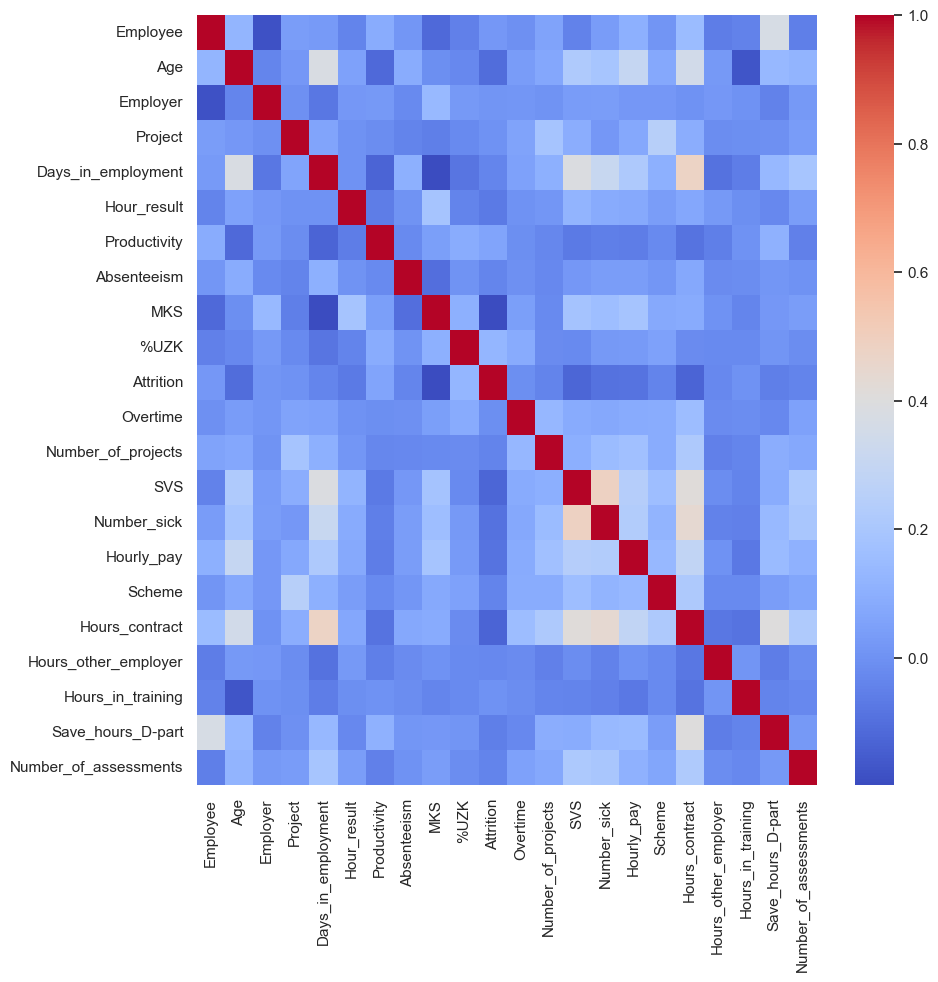

In [750]:
corr_matrix = df.corr()

rank = np.linalg.matrix_rank(corr_matrix)

sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.show()

In [751]:
#checking all possible nationalities
unique_values_nat = df['Nationality'].unique()
print(unique_values_nat)

['Nederlandse' 'Indonesische' 'Portugese' 'Nepalese' 'Poolse' 'Belgische'
 'Italiaanse' 'Spaanse' 'Turkse' 'Marokkaanse' 'Thaise' 'Guinese' 'Duitse'
 'Liberiaanse' 'Braziliaanse' 'Slowaakse' 'Ghanese' 'Ierse' 'Angolese'
 'Kaapverdische' 'Franse' 'Roemeense' 'Sri Lankaanse' 'Chinese'
 'Burger van Democratische Republiek Congo' 'Tsjechische'
 'Burger van Dominica' 'Brits burger' 'Filipijnse' 'Bengalese' 'Burundese'
 'Jamaicaanse' 'Griekse' 'Surinaamse' 'Eritrese' 'Chileense' 'Kenyaanse'
 'Indiase' 'Sloveense' 'Kongolese' 'Bulgaarse' 'Hongaarse' 'Peruaanse'
 'Burger van Bosnië-Herzegovina' 'Japanse' 'Oekraïense' 'Colombiaanse'
 'Cubaanse' 'Sierra Leoonse' 'Pakistaanse' 'Venezolaanse' 'Litouwse'
 'Russische' 'Iraakse' 'Nigerese' 'Letse' 'Botswaanse' 'Somalische'
 'Syrische' 'Ecuadoraanse' 'Georgische' 'Ugandese' 'Vietnamese'
 'Ivoriaanse' 'Kroatische' 'Singaporese' 'Rwandese' 'Zuid-Afrikaanse'
 'Egyptische' 'Belarussische' 'Onbekend' 'Gambiaanse' 'Ethiopische'
 'Argentijnse' 'Afghaanse' 'N

In [752]:
#counting what nationalities occur the most in a dataframe
counts = df['Nationality'].value_counts()
table = pd.DataFrame({'Nationality': counts.index, 'Count': counts.values})

print(table)

     Nationality  Count
0    Nederlandse   5934
1         Poolse    509
2     Oekraïense    497
3      Bulgaarse    355
4        Spaanse    263
..           ...    ...
140  Singaporese      1
141  Maleisische      1
142    IJslandse      1
143   Ivoriaanse      1
144     Canadese      1

[145 rows x 2 columns]


In [753]:
#changing nationality to top 20 values and others
df['count'] = 1
df_count = df.groupby(['Nationality']).count().reset_index()

top_20 = df_count.nlargest(20, 'count')
top_20_list = list(top_20['Nationality'])
df['Nationality'] = df['Nationality'].apply(lambda x: x if x in top_20_list else 'others')


In [754]:
#same as with nationality
counts = df['Job_description'].value_counts()
table = pd.DataFrame({'Job_description': counts.index, 'Count': counts.values})

print(table)

                   Job_description  Count
0       Schoonmaakmedewerker Hotel   4536
1             Schoonmaakmedewerker   3703
2                Supervisor (2.1b)    397
3                   Vakantiekracht    378
4                        Stagiaire    140
5             Vakantiekracht Hotel    133
6                Voorwerker (2.1b)    128
7                Housekeeper (3.1)    120
8                    Student Hotel    101
9                Supervisor (2.1a)     67
10          Supervisor (2.1b) i.o.     48
11              Objectleider (3.1)     40
12                         Student     33
13               Voorwerker (2.1a)     31
14     Assistent Housekeeper (3.1)     29
15               Housekeeper (3.2)     29
16           Spoelkeukenmedewerker     29
17              Objectleider (3.2)     24
18           Ambulant Objectleider     20
19                        Handyman     16
20  All-round schoonmaakmedewerker     16
21      Medewerker Algemene Dienst     13
22          Housekeeper (3.1) i.o.

In [755]:
#changing function to top values and others(less than 10 records)
roles_to_replace = df['Job_description'].value_counts()[df['Job_description'].value_counts() < 10].index.tolist()
df.loc[df['Job_description'].isin(roles_to_replace), 'Job_description'] = 'other'

In [756]:
df

,Employee,Age,Gender,Nationality,Start_date,End_date,Employer,Job_description,Region,Project,Segment,reason_end_employment,Industry_date,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count
0,37,55,Vrouw,Nederlandse,1995-10-02,NaT,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,NaN,1995-10-02,10075,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,1,14.58,0.0,Onbepaalde tijd,30.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0,X,1
1,38,58,Vrouw,Nederlandse,1999-03-27,NaT,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,NaN,1999-03-27,8803,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,0,13.87,0.0,Onbepaalde tijd,10.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0,X,1
2,40,45,Vrouw,Nederlandse,2001-08-21,NaT,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,NaN,2001-08-21,7925,0.495,0.000,0.0111,8.03,0.0000,0.122,0.0,1,0,0,13.87,0.0,Onbepaalde tijd,25.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,0,X,1
3,46,54,Vrouw,Nederlandse,2000-01-03,NaT,98,Housekeeper (3.1),Regio Amsterdam,13002,Hotels,NaN,2000-01-03,8521,-0.072,0.690,0.0498,8.71,0.3589,0.531,2.0,2,1,3,16.64,0.0,Onbepaalde tijd,38.0,Nee,0.0,Nee,0.0,0,0,N,Vast,N,1,X,1
4,49,64,Vrouw,Nederlandse,2000-08-09,NaT,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,NaN,2000-08-09,8302,0.136,0.635,0.0653,7.47,0.1951,0.534,0.0,1,0,4,13.87,0.0,Onbepaalde tijd,25.0,Nee,0.0,Nee,0.0,1,0,N,Vast,N,0,X,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10281,9207678,34,Vrouw,Roemeense,2020-02-10,2020-09-10,92,Schoonmaakmedewerker,Regio Zuid-West,80037,Hotels,Einde van rechtswege,2020-02-10,1178,-0.347,0.000,0.0794,0.00,0.0000,0.000,0.0,1,0,0,11.27,0.0,Bepaalde tijd,0.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0,Millennials,1
10282,9207679,49,Vrouw,others,2021-09-29,NaT,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80135,Hotels,NaN,2021-09-29,581,0.121,1.062,0.1462,9.80,0.0000,0.125,0.0,1,0,0,12.58,0.0,Onbepaalde tijd,9.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Vast,N,0,X,1
10283,9207685,55,Vrouw,Portugese,2020-02-10,2020-09-10,92,Schoonmaakmedewerker,Regio Zuid-West,80058,Hotels,Einde van rechtswege,2020-02-10,1178,0.377,0.912,0.0144,0.00,0.0000,0.000,0.0,3,0,0,11.27,0.0,Bepaalde tijd,0.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0,X,1
10284,9207692,28,Man,Nederlandse,2020-02-15,2020-07-31,92,Schoonmaakmedewerker,Regio Zuid-West,80023,Hotels,EV - Andere baan,2020-02-15,1173,0.100,0.842,0.0290,0.00,0.0000,4.000,0.0,1,0,0,11.27,0.0,Bepaalde tijd,0.0,Nee,0.0,Nee,0.0,0,Via Hotel Cleaning Company,N,Variabel,N,0,Z,1


In [757]:
#creating a new variable for when an employee is working more hours for another employer
df['higher_hours'] = df.apply(lambda row: 1 if row['Hours_other_employer'] > row['Hours_contract'] else 0, axis=1)

In [758]:
#creating a new variable for when an employee is working more than 45 hours, which might mean he's overworked
df['many_hours'] = df.apply(lambda row: 1 if row['Hours_contract'] + row['Hours_other_employer'] > 45 else 0, axis= 1 )

In [759]:
#checking the proportions of these newly created variables
print(df['many_hours'].value_counts())
print(df['higher_hours'].value_counts())

0    10075
1       24
Name: many_hours, dtype: int64
0    9565
1     534
Name: higher_hours, dtype: int64


In [763]:
#ANALYSIS OF 8 MONTHS CONTRACTS

In [764]:
EM = df[(df["Contract"] == "8 maanden")]
EM

,Employee,Age,Gender,Nationality,Start_date,End_date,Employer,Job_description,Region,Project,Segment,reason_end_employment,Industry_date,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours
440,5861,59,Vrouw,Nederlandse,2023-03-27,NaT,98,Schoonmaakmedewerker Hotel,Regio ZON,1330,Hotels,NaN,2023-03-27,37,-0.093,0.837,0.0000,9.40,0.0000,0.125,0.00,1,1,1,12.15,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
487,6325,67,Vrouw,Nederlandse,2022-09-12,NaT,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,NaN,2011-01-10,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
604,7206,55,Vrouw,Nederlandse,2021-05-01,2021-08-27,98,Supervisor (2.1b),Regio ZON,1201,Hotels,EV - Andere baan,2021-05-01,732,-0.238,0.836,0.1695,0.00,0.1410,0.588,13.25,1,0,0,14.38,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,N,0,X,1,0,0
795,8339,42,Vrouw,Poolse,2023-02-20,NaT,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,NaN,2023-02-20,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0
803,8378,28,Vrouw,Nederlandse,2023-03-21,NaT,98,Schoonmaakmedewerker,Regio ZON,20069,Onderwijs,NaN,2023-03-21,43,0.556,0.000,0.0234,8.10,0.0000,0.143,0.00,2,1,0,13.87,0.00,8 maanden,0.0,Nee,0.0,Ja,5.0,0,Her indienst,N,Variabel,J,0,Z,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,9207170,64,Vrouw,Nederlandse,2022-07-11,2023-03-10,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80001,Hotels,Einde van rechtswege,2022-07-11,296,-0.010,0.773,0.0744,8.30,0.0415,0.387,0.00,0,0,0,12.70,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
10198,9207183,46,Man,Spaanse,2023-05-01,NaT,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80135,Hotels,NaN,2023-05-01,2,0.121,1.062,0.1462,9.80,0.0000,0.125,0.00,0,0,0,12.15,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,N,0,X,1,0,0
10231,9207519,23,Vrouw,Nederlandse,2022-10-24,NaT,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80136,Hotels,NaN,2021-06-21,191,0.040,0.958,0.0330,9.07,0.0000,0.324,0.00,1,0,0,12.15,0.00,8 maanden,0.0,Nee,0.0,Ja,0.0,0,Her indienst,N,Variabel,N,0,Z,1,0,0
10249,9207604,55,Vrouw,Nederlandse,2022-09-14,2022-10-10,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80053,Hotels,EV - Werk te zwaar,2022-09-14,231,-0.329,0.875,0.0343,7.70,0.0758,1.412,0.00,2,0,0,11.83,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0


In [765]:
import pandas as pd
import datetime

EM['Start_date'] = pd.to_datetime(EM['Start_date'])
EM['End_date'] = pd.to_datetime(EM['End_date'])

def calculate_days(row):
    if pd.isnull(row['End_date']):
        return 0
    else:
        end_date = row['End_date'].date()
        start_date = row['Start_date'].date()
        return (end_date - start_date).days

EM['days_worked'] = EM.apply(calculate_days, axis=1)

EM_left = EM[~pd.isnull(EM['End_date'])]

EM_left['quit_month'] = EM_left['End_date'].apply(lambda x: x.month)

EM_left['months_worked'] = EM_left['days_worked'].apply(lambda x: int(x/30))

bins = [0, 30, 60, 90, 120, 150, 180, 210, 260]
labels = ['1 month', '2 months', '3 months', '4 months', '5 months', '6 months', '7 months', '8 months']
EM_left['cluster'] = pd.cut(EM_left['days_worked'], bins=bins, labels=labels)

grouped_data = EM_left.groupby(['cluster', 'quit_month']).size().reset_index(name='counts')


grouped_data

C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\2077865076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EM['Start_date'] = pd.to_datetime(EM['Start_date'])
C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\2077865076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EM['End_date'] = pd.to_datetime(EM['End_date'])
C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\2077865076.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,cluster,quit_month,counts
0,1 month,1,76
1,1 month,2,97
2,1 month,3,157
3,1 month,4,182
4,1 month,5,119
...,...,...,...
91,8 months,8,2
92,8 months,9,13
93,8 months,10,27
94,8 months,11,30


C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\2208486033.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="quit_month", y="counts", hue="cluster", data=grouped_data, ci=None)


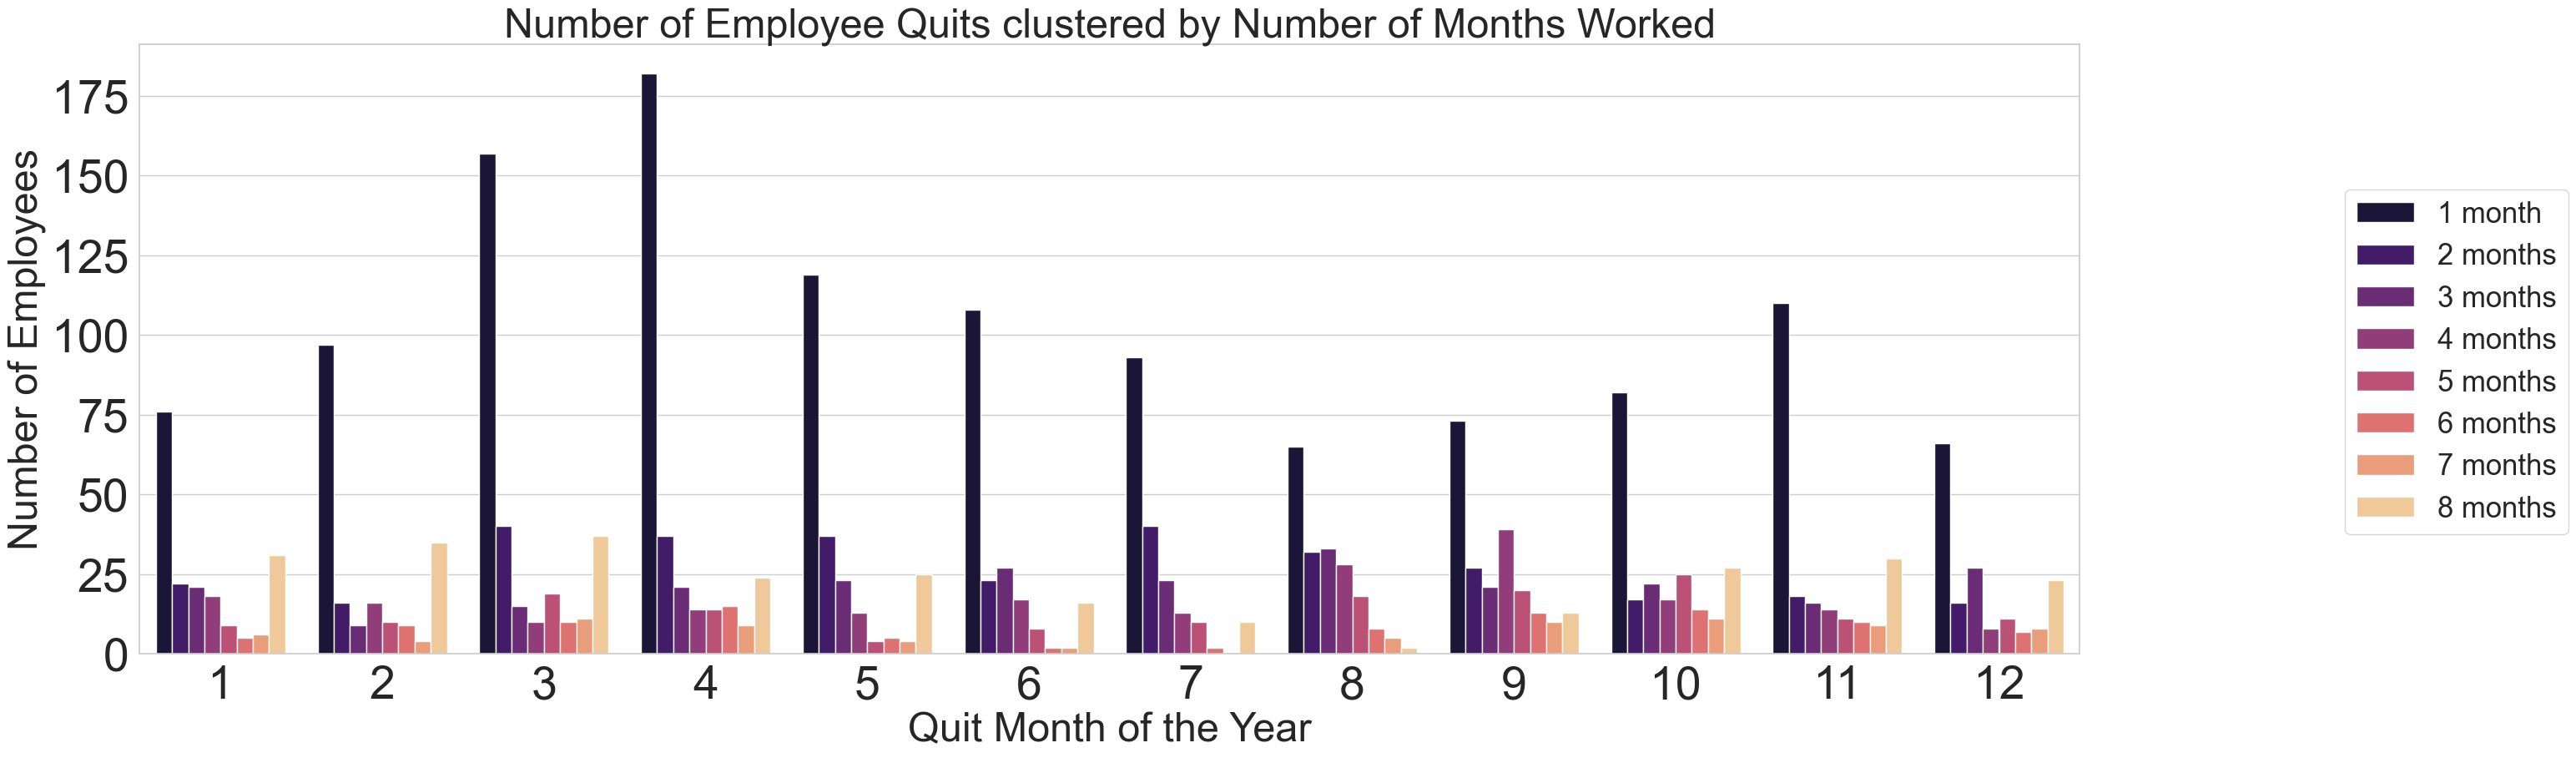

In [766]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

colors = sns.color_palette("magma", len(labels))
sns.set_style("whitegrid")
sns.set_palette(colors)

plt.figure(figsize=(30, 10))

ax = sns.barplot(x="quit_month", y="counts", hue="cluster", data=grouped_data, ci=None)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=25, bbox_transform=plt.gcf().transFigure, borderaxespad=0.5)
plt.title('Number of Employee Quits clustered by Number of Months Worked', fontsize=35)
plt.xlabel('Quit Month of the Year', fontsize=35)
plt.ylabel('Number of Employees', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.subplots_adjust(bottom=0.15)

plt.show()

In [767]:
 #looking at the blue line, we can see that most of the employees who worked for 6 months quit the company in the first few months of the year, 
    #while the employees who worked for 2 months quit more evenly throughout the year

In [770]:
# 8 months contract overall

In [771]:
#mask on active employees
mask = df['End_date'].isnull()

df_active = df[mask]

In [772]:
condition = df_active['Contract'] == "8 maanden"
eight_months = df_active[condition]

#assume they end before the contract termination 
#fixed contract between 1 and 2 years
#separate ppl on 8 month contract above 8months

In [773]:
eight_months  #856 active 8-month contracts

,Employee,Age,Gender,Nationality,Start_date,End_date,Employer,Job_description,Region,Project,Segment,reason_end_employment,Industry_date,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours
440,5861,59,Vrouw,Nederlandse,2023-03-27,NaT,98,Schoonmaakmedewerker Hotel,Regio ZON,1330,Hotels,NaN,2023-03-27,37,-0.093,0.837,0.0000,9.40,0.0000,0.125,0.00,1,1,1,12.15,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
487,6325,67,Vrouw,Nederlandse,2022-09-12,NaT,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,NaN,2011-01-10,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
795,8339,42,Vrouw,Poolse,2023-02-20,NaT,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,NaN,2023-02-20,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0
803,8378,28,Vrouw,Nederlandse,2023-03-21,NaT,98,Schoonmaakmedewerker,Regio ZON,20069,Onderwijs,NaN,2023-03-21,43,0.556,0.000,0.0234,8.10,0.0000,0.143,0.00,2,1,0,13.87,0.00,8 maanden,0.0,Nee,0.0,Ja,5.0,0,Her indienst,N,Variabel,J,0,Z,1,0,0
1357,11230,68,Vrouw,Poolse,2021-08-30,NaT,98,Schoonmaakmedewerker,Regio Midden-West,20099,Kantoren & Vastgoed,NaN,2021-08-30,611,0.596,0.000,0.0000,0.00,0.0000,0.000,0.00,1,0,0,13.87,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Via eigen aanname EW,N,Variabel,N,0,X,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9611,9121460,36,Vrouw,Nederlandse,2022-11-01,NaT,98,Schoonmaakmedewerker Hotel,Regio ZON,20166,Hotels,NaN,2021-06-05,183,0.051,0.887,0.0033,9.43,0.0000,0.571,0.00,1,0,1,12.58,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0
9629,9121540,48,Vrouw,Roemeense,2023-03-24,NaT,98,Schoonmaakmedewerker Hotel,Regio ZON,80126,Hotels,NaN,2023-03-24,40,0.221,0.947,0.0113,8.93,0.0000,0.392,0.00,1,0,0,13.45,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
9789,9122301,51,Vrouw,others,2022-11-28,NaT,98,Schoonmaakmedewerker Hotel,Regio ZON,20182,Hotels,NaN,2022-11-28,156,-0.071,0.773,0.0018,0.00,0.0000,0.500,0.00,2,0,2,12.15,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,J,0,X,1,0,0
10198,9207183,46,Man,Spaanse,2023-05-01,NaT,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,80135,Hotels,NaN,2023-05-01,2,0.121,1.062,0.1462,9.80,0.0000,0.125,0.00,0,0,0,12.15,0.00,8 maanden,0.0,Nee,0.0,Nee,0.0,0,Her indienst,N,Variabel,N,0,X,1,0,0


In [774]:
#how many above 8 months on this contract
condition = df_active['End_date'] < '2022-09-01'
eight_months_above = eight_months[condition]

C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\3767422923.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eight_months_above = eight_months[condition]


In [775]:
eight_months_above  #59 employees with contracts with startdate before septmeber

,Employee,Age,Gender,Nationality,Start_date,End_date,Employer,Job_description,Region,Project,Segment,reason_end_employment,Industry_date,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours


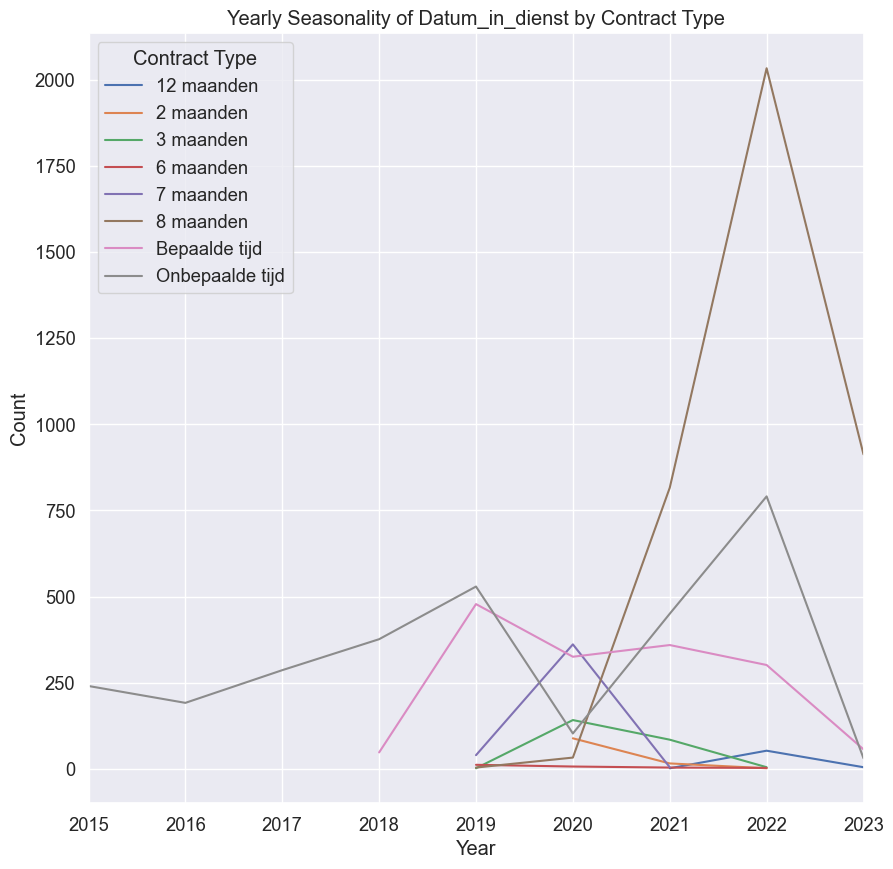

In [776]:
#all data startdate seasonality
sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=1.2)

counts = df.groupby([df['Contract'], df['Start_date'].dt.year])['Start_date'].count()
counts.unstack(level=0).plot(kind='line', xlabel='Year', ylabel='Count', title='Yearly Seasonality of Datum_in_dienst by Contract Type')
plt.legend(title='Contract Type')
plt.xlim(2015, 2023)
plt.show()

#8months and fixed contracts only
#bepaalde or 8months

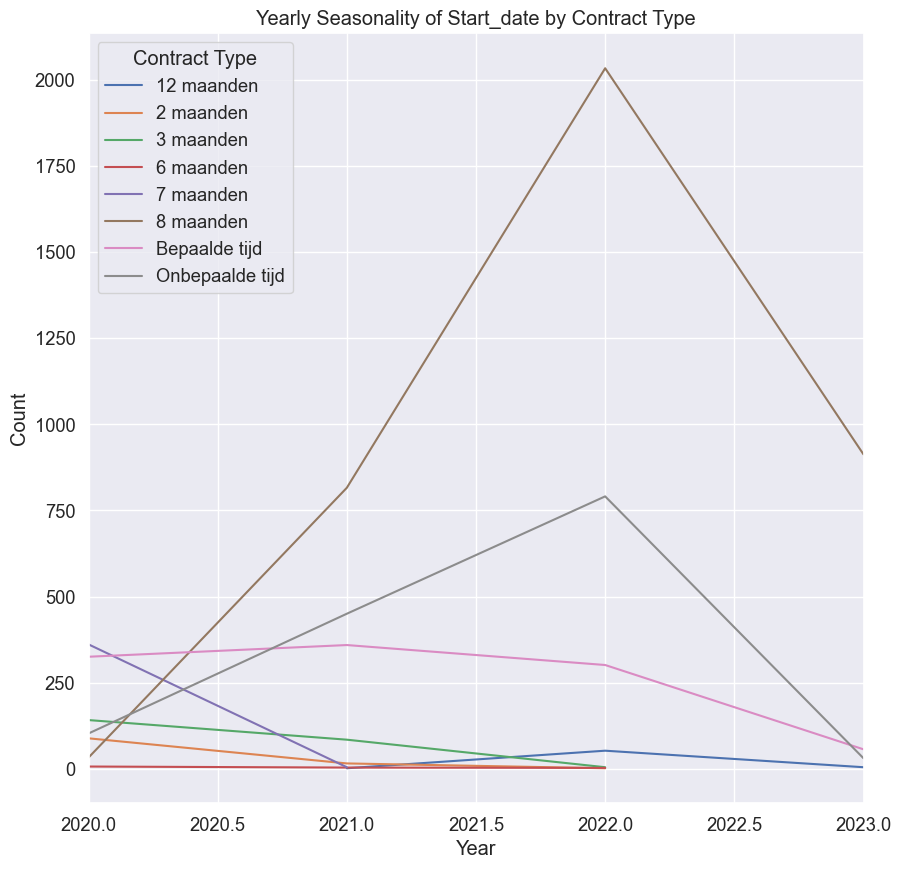

In [777]:
counts = df.groupby([df['Contract'], df['Start_date'].dt.year])['Start_date'].count()
counts.unstack(level=0).plot(kind='line', xlabel='Year', ylabel='Count', title='Yearly Seasonality of Start_date by Contract Type')
plt.legend(title='Contract Type', loc='upper left')
plt.xlim(2020, 2023)
plt.show()
#check who extended

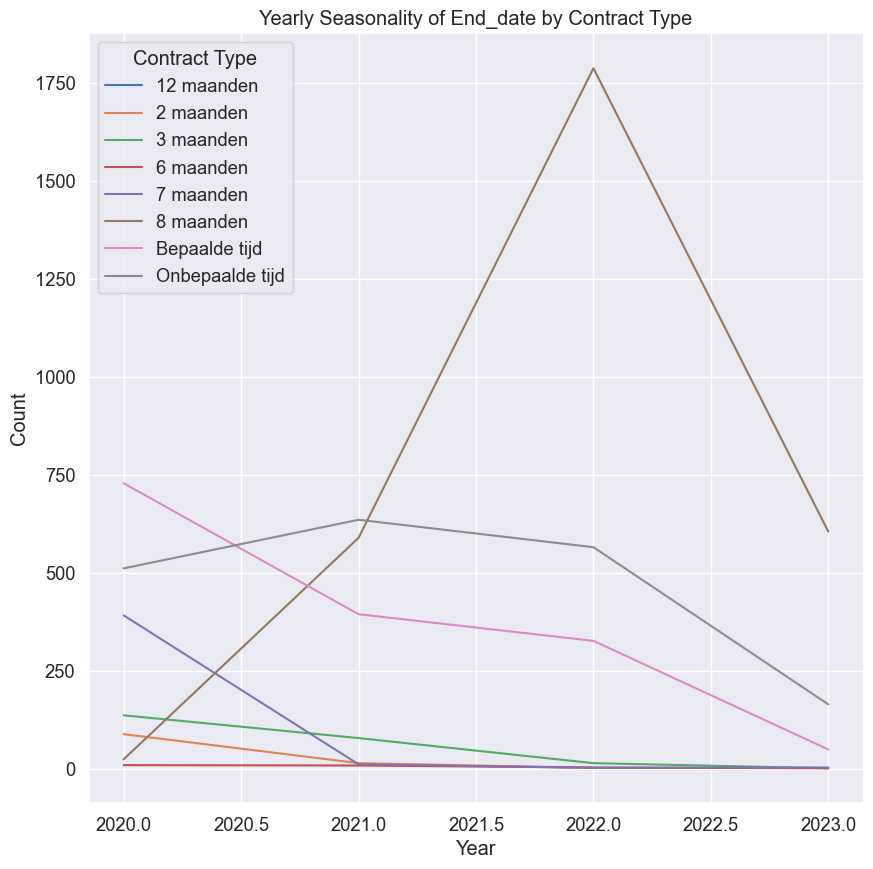

In [778]:
#all data enddate seasonality
counts = df.groupby([df['Contract'], df['End_date'].dt.year])['End_date'].count()
counts.unstack(level=0).plot(kind='line', xlabel='Year', ylabel='Count', title='Yearly Seasonality of End_date by Contract Type')
plt.legend(title='Contract Type')
plt.show()

In [779]:
#EXPERIMENT GROUP

In [780]:
#in this section, experiment group will be created - 200 employees will be randomly chosen from all 8-month contract employees (with additinal assumptions if needed)

In [782]:
experiment_group = df[(df["Contract"] == "8 maanden") 
                      & (df["End_date"].isnull()) 
                      & (df["Start_date"] < "2023-03-01")
                      & (df["Days_in_employment"] < 300)]

In [783]:
print(experiment_group['higher_hours'].value_counts())
print(experiment_group['many_hours'].value_counts())

0    404
1     27
Name: higher_hours, dtype: int64
0    431
Name: many_hours, dtype: int64


In [786]:
print(experiment_group.isna().sum())

Employee                    0
Age                         0
Gender                      0
Nationality                 0
Start_date                  0
End_date                  431
Employer                    0
Job_description             0
Region                      0
Project                     0
Segment                     0
reason_end_employment     431
Industry_date               0
Days_in_employment          0
Hour_result                 0
Productivity                0
Absenteeism                 0
MKS                         0
%UZK                        0
Attrition                   0
Overtime                    0
Number_of_projects          0
SVS                         0
Number_sick                 0
Hourly_pay                  0
Scheme                      0
Contract                    0
Hours_contract              0
Another_employer            0
Hours_other_employer        0
Training                    0
Hours_in_training           0
Save_hours_D-part           0
Reason_for

In [787]:
experiment_group = experiment_group.drop('Start_date', axis=1)
experiment_group = experiment_group.drop('reason_end_employment', axis=1)

In [788]:
experiment_group = experiment_group.drop('Industry_date', axis=1)

In [790]:
print(experiment_group.columns)

Index(['Employee', 'Age', 'Gender', 'Nationality', 'End_date', 'Employer',
       'Job_description', 'Region', 'Project', 'Segment', 'Days_in_employment',
       'Hour_result', 'Productivity', 'Absenteeism', 'MKS', '%UZK',
       'Attrition', 'Overtime', 'Number_of_projects', 'SVS', 'Number_sick',
       'Hourly_pay', 'Scheme', 'Contract', 'Hours_contract',
       'Another_employer', 'Hours_other_employer', 'Training',
       'Hours_in_training', 'Save_hours_D-part', 'Reason_for_joining',
       'Pathway MDP', 'VAST-VAR hours', 'Introduction completed',
       'Number_of_assessments', 'Generation', 'count', 'higher_hours',
       'many_hours'],
      dtype='object')


In [791]:
min_days = experiment_group['Days_in_employment'].min()
max_days = experiment_group['Days_in_employment'].max()

print("Range of values in 'Days_in_employment' column:")
print("Minimum:", min_days)
print

Range of values in 'Days_in_employment' column:
Minimum: 64


<function print>

In [684]:
print("Range of values in 'Days_in_employment' column:")
print("Minimum:", max_days)
print

Range of values in 'Days_in_employment' column:
Minimum: 339


<function print>

In [912]:
ranges = [0, 30, 90, 120, 150, 180, 210, 240,270]  

labels = list(range(len(ranges) - 1))

experiment_group['employment_cluster'] = pd.cut(experiment_group['Days_in_employment'], bins=ranges, labels=labels, right=False)

In [914]:
probabilities = [0.35, 0.65]

clusters = experiment_group['employment_cluster'].unique()

experiment_group['Treatment'] = ''

#block randomization on employment cluster level
for cluster in clusters:
    cluster_indices = experiment_group[experiment_group['employment_cluster'] == cluster].index
    num_samples = len(cluster_indices)
    num_treatment = int(num_samples * probabilities[0])
    num_control = num_samples - num_treatment
    treatment_indices = np.random.choice(cluster_indices, size=num_treatment, replace=False)
    control_indices = np.setdiff1d(cluster_indices, treatment_indices)
    experiment_group.loc[treatment_indices, 'Treatment'] = '1'
    experiment_group.loc[control_indices, 'Treatment'] = '0'

In [916]:
print(experiment_group['Treatment'].value_counts())

0    222
1    197
      12
Name: Treatment, dtype: int64


Treatment group distribution: 1.0
Control group distribution: 1.0


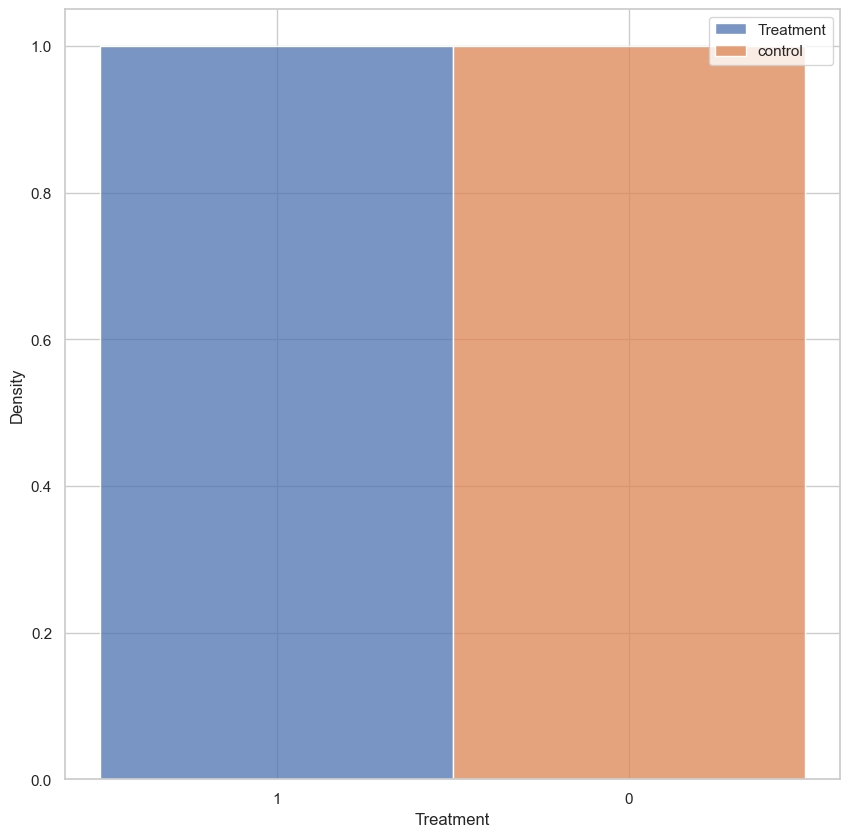

In [917]:
Treatment_dist = experiment_group[experiment_group['Treatment'] == '1']['Treatment'].count() / len(experiment_group[experiment_group['Treatment'] == '1'])

control_dist = experiment_group[experiment_group['Treatment'] == '0']['Treatment'].count() / len(experiment_group[experiment_group['Treatment'] == '0'])

sns.histplot(experiment_group[experiment_group['Treatment'] == '1']['Treatment'], label='Treatment', kde=False, stat='density')
sns.histplot(experiment_group[experiment_group['Treatment'] == '0']['Treatment'], label='control', kde=False, stat='density')
plt.legend()

print('Treatment group distribution:', Treatment_dist)
print('Control group distribution:', control_dist)

In [919]:
treatment = experiment_group[experiment_group['Treatment'] == "1"]
control = experiment_group[experiment_group['Treatment'] == "0"]

print(f"Number of rows in treatment dataframe: {len(treatment)}")
print(f"Number of rows in control dataframe: {len(control)}")

Number of rows in treatment dataframe: 197
Number of rows in control dataframe: 222


In [920]:
print(type(experiment_group))
print(type(control))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [921]:
control.to_excel('experiment_control_group.xlsx', index=False)
treatment.to_excel('experiment_treatment_group.xlsx', index=False)

In [922]:
#GROUPS ANALYSIS

In [923]:
treatment = pd.read_excel('experiment_treatment_group.xlsx')
control = pd.read_excel('experiment_control_group.xlsx')

In [924]:
treatment_stats = treatment.describe()
control_stats = control.describe()

In [925]:
treatment_stats

,Employee,Age,End_date_x,Employer,Project,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Hours_other_employer,Hours_in_training,Save_hours_D-part,Number_of_assessments,count,higher_hours,many_hours,employment_cluster,Treatment,Before,After
count,1.970000e+02,197.000000,0.0,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.0,197.000000,197.0,197.000000,197.0,197.000000,197.0,197.0,197.000000
mean,2.594339e+05,36.157360,NaN,98.0,21100.624365,133.928934,0.152706,0.601041,0.069543,8.233452,0.090547,0.413523,1.954315,1.725888,0.025381,0.162437,12.188071,0.058122,0.385787,0.903553,1.142132,0.0,0.005076,1.0,0.055838,0.0,2.984772,1.0,0.0,0.137056
std,6.351770e+05,14.091197,NaN,0.0,26868.720049,50.316904,0.239131,0.402202,0.068404,1.837580,0.158115,0.333424,11.305726,1.086085,0.157679,0.738179,0.890700,0.261869,3.819045,4.402671,5.377590,0.0,0.071247,0.0,0.230193,0.0,1.655162,0.0,0.0,0.344782
min,1.183800e+04,18.000000,NaN,98.0,1000.000000,64.000000,-0.418000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.720000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.000000,1.0,0.0,0.000000
25%,2.172820e+05,23.000000,NaN,98.0,1742.000000,89.000000,-0.014000,0.000000,0.017900,8.030000,0.000000,0.185000,0.000000,1.000000,0.000000,0.000000,12.150000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.000000,1.0,0.0,0.000000
50%,2.178220e+05,34.000000,NaN,98.0,20009.000000,126.000000,0.119000,0.773000,0.049800,8.710000,0.000000,0.324000,0.000000,1.000000,0.000000,0.000000,12.150000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,3.000000,1.0,0.0,0.000000
75%,2.182120e+05,47.000000,NaN,98.0,20175.000000,177.000000,0.315000,0.898000,0.113600,8.980000,0.129200,0.531000,0.000000,2.000000,0.000000,0.000000,12.150000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,4.000000,1.0,0.0,0.000000
max,9.122301e+06,69.000000,NaN,98.0,80144.000000,269.000000,0.653000,1.274000,0.369600,9.900000,0.556600,2.000000,136.650000,7.000000,1.000000,6.000000,16.130000,1.870000,38.000000,38.000000,35.000000,0.0,1.000000,1.0,1.000000,0.0,7.000000,1.0,0.0,1.000000


In [926]:
comparison = pd.concat([treatment_stats, control_stats], axis=1, keys=['treatment', 'control'])
comparison.columns = comparison.columns.swaplevel()

print(comparison)

           Employee         Age End_date_x  Employer       Project  \
          treatment   treatment  treatment treatment     treatment   
count  1.970000e+02  197.000000        0.0     197.0    197.000000   
mean   2.594339e+05   36.157360        NaN      98.0  21100.624365   
std    6.351770e+05   14.091197        NaN       0.0  26868.720049   
min    1.183800e+04   18.000000        NaN      98.0   1000.000000   
25%    2.172820e+05   23.000000        NaN      98.0   1742.000000   
50%    2.178220e+05   34.000000        NaN      98.0  20009.000000   
75%    2.182120e+05   47.000000        NaN      98.0  20175.000000   
max    9.122301e+06   69.000000        NaN      98.0  80144.000000   

      Days_in_employment Hour_result Productivity Absenteeism         MKS  \
               treatment   treatment    treatment   treatment   treatment   
count         197.000000  197.000000   197.000000  197.000000  197.000000   
mean          133.928934    0.152706     0.601041    0.069543    8.2

In [927]:
comparison

,Employee,Age,End_date_x,Employer,Project,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Hours_other_employer,Hours_in_training,Save_hours_D-part,Number_of_assessments,count,higher_hours,many_hours,employment_cluster,Treatment,Before,After,Employee,Age,End_date_x,Employer,Project,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Hours_other_employer,Hours_in_training,Save_hours_D-part,Number_of_assessments,count,higher_hours,many_hours,employment_cluster,Treatment,Before,After
,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,treatment,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control,control
count,1.970000e+02,197.000000,0.0,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.0,197.000000,197.0,197.000000,197.0,197.000000,197.0,197.0,197.000000,2.220000e+02,222.000000,0.0,222.0,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0,222.0,222.0,222.000000,222.0,222.000000,222.0,222.0,222.000000
mean,2.594339e+05,36.157360,NaN,98.0,21100.624365,133.928934,0.152706,0.601041,0.069543,8.233452,0.090547,0.413523,1.954315,1.725888,0.025381,0.162437,12.188071,0.058122,0.385787,0.903553,1.142132,0.0,0.005076,1.0,0.055838,0.0,2.984772,1.0,0.0,0.137056,3.353487e+05,35.463964,NaN,98.0,25086.653153,134.977477,0.167658,0.638468,0.073446,8.066441,0.085012,0.404239,0.856171,1.563063,0.018018,0.229730,12.299730,0.036532,0.342342,0.945946,1.076577,0.0,0.0,1.0,0.067568,0.0,3.018018,0.0,0.0,0.166667
std,6.351770e+05,14.091197,NaN,0.0,26868.720049,50.316904,0.239131,0.402202,0.068404,1.837580,0.158115,0.333424,11.305726,1.086085,0.157679,0.738179,0.890700,0.261869,3.819045,4.402671,5.377590,0.0,0.071247,0.0,0.230193,0.0,1.655162,0.0,0.0,0.344782,1.034318e+06,13.371005,NaN,0.0,30728.734615,50.952772,0.227836,0.407101,0.064193,2.001732,0.157422,0.331763,3.950862,1.081764,0.133317,0.703205,0.917707,0.169845,3.598631,3.859144,4.868264,0.0,0.0,0.0,0.251570,0.0,1.682930,0.0,0.0,0.373520
min,1.183800e+04,18.000000,NaN,98.0,1000.000000,64.000000,-0.418000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.720000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.000000,1.0,0.0,0.000000,6.325000e+03,18.000000,NaN,98.0,1000.000000,64.000000,-0.418000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.720000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,1.000000,0.0,0.0,0.000000
25%,2.172820e+05,23.000000,NaN,98.0,1742.000000,89.000000,-0.014000,0.000000,0.017900,8.030000,0.000000,0.185000,0.000000,1.000000,0.000000,0.000000,12.150000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.0,1.000000,1.0,0.0,0.000000,2.172292e+05,23.000000,NaN,98.0,1763.000000,89.250000,0.013000,0.000000,0.019450,7.900000,0.000000,0.186000,0.000000,1.000000,0.000000,0.000000,12.150000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.000000,0.0,1.250000,0.0,0.0,0.000000
50%,2.178220e+05,34.000000,NaN,98.0,20009.000000,126.000000,0.119000,0.773000,0.049800,8.710000,0.000000,0.324000,0.000000,1.000000,0.000000,0.000000,12.150000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1

In [928]:
df = pd.concat([treatment_stats, control_stats], axis=0, keys=['treatment', 'control'])
df = df.select_dtypes(include=['float64', 'int64'])
df = df.apply(lambda x: round(x, 2) if np.issubdtype(x.dtype, np.number) else x)

pd.set_option('display.max_columns', None)
df

Employee     Age  End_date_x  Employer   Project  \
treatment count      197.00  197.00         0.0     197.0    197.00   
          mean    259433.94   36.16         NaN      98.0  21100.62   
          std     635176.97   14.09         NaN       0.0  26868.72   
          min      11838.00   18.00         NaN      98.0   1000.00   
          25%     217282.00   23.00         NaN      98.0   1742.00   
          50%     217822.00   34.00         NaN      98.0  20009.00   
          75%     218212.00   47.00         NaN      98.0  20175.00   
          max    9122301.00   69.00         NaN      98.0  80144.00   
control   count      222.00  222.00         0.0     222.0    222.00   
          mean    335348.68   35.46         NaN      98.0  25086.65   
          std    1034317.63   13.37         NaN       0.0  30728.73   
          min       6325.00   18.00         NaN      98.0   1000.00   
          25%     217229.25   23.00         NaN      98.0   1763.00   
          50%     217805.50   34.00         NaN      98.0  20026.50   
          75%     218231.00   45.00         NaN      98.0  20179.00   
          max    9207519.00   67.00         NaN      98.0  80144.00   

                 Days_in_employment  Hour_result  Productivity  Absenteeism  \
treatment count              197.00       197.00        197.00       197.00   
          mean               133.93         0.15          0.60         0.07   
          std                 50.32         0.24          0.40         0.07   
          min                 64.00        -0.42          0.00         0.00   
          25%                 89.00        -0.01          0.00         0.02   
          50%                126.00         0.12          0.77         0.05   
          75%                177.00         0.32          0.90         0.11   
          max                269.00         0.65          1.27         0.37   
control   count              222.00       222.00        222.00       222.00   
          mean               134.98         0.17          0.64         0.07   
          std                 50.95         0.23          0.41         0.06   
          min                 64.00        -0.42          0.00         0.00   
          25%                 89.25         0.01          0.00         0.02   
          50%                127.00         0.12          0.85         0.05   
          75%                177.00         0.32          0.92         0.11   
          max                261.00         0.79          1.27         0.33   

                    MKS    %UZK  Attrition  Overtime  Number_of_projects  \
treatment count  197.00  197.00     197.00    197.00              197.00   
          mean     8.23    0.09       0.41      1.95                1.73   
          std      1.84    0.16       0.33     11.31                1.09   
          min      0.00    0.00       0.00      0.00                1.00   
          25%      8.03    0.00       0.18      0.00                1.00   
          50%      8.71    0.00       0.32      0.00                1.00   
          75%      8.98    0.13       0.53      0.00                2.00   
          max      9.90    0.56       2.00    136.65                7.00   
control   count  222.00  222.00     222.00    222.00              222.00   
          mean     8.07    0.09       0.40      0.86                1.56   
          std      2.00    0.16       0.33      3.95                1.08   
          min      0.00    0.00       0.00      0.00                0.00   
          25%      7.90    0.00       0.19      0.00                1.00   
          50%      8.57    0.00       0.33      0.00                1.00   
          75%      8.93    0.10       0.52      0.00                2.00   
          max     10.00    0.83       2.00     34.17                7.00   

                    SVS  Number_sick  Hourly_pay  Scheme  Hours_contract  \
treatment count  197.00       197.00      197.00  197.00          197.00   
          mean     0.0

In [929]:
df = df.round(2)

In [930]:
df

Employee     Age  End_date_x  Employer   Project  \
treatment count      197.00  197.00         0.0     197.0    197.00   
          mean    259433.94   36.16         NaN      98.0  21100.62   
          std     635176.97   14.09         NaN       0.0  26868.72   
          min      11838.00   18.00         NaN      98.0   1000.00   
          25%     217282.00   23.00         NaN      98.0   1742.00   
          50%     217822.00   34.00         NaN      98.0  20009.00   
          75%     218212.00   47.00         NaN      98.0  20175.00   
          max    9122301.00   69.00         NaN      98.0  80144.00   
control   count      222.00  222.00         0.0     222.0    222.00   
          mean    335348.68   35.46         NaN      98.0  25086.65   
          std    1034317.63   13.37         NaN       0.0  30728.73   
          min       6325.00   18.00         NaN      98.0   1000.00   
          25%     217229.25   23.00         NaN      98.0   1763.00   
          50%     217805.50   34.00         NaN      98.0  20026.50   
          75%     218231.00   45.00         NaN      98.0  20179.00   
          max    9207519.00   67.00         NaN      98.0  80144.00   

                 Days_in_employment  Hour_result  Productivity  Absenteeism  \
treatment count              197.00       197.00        197.00       197.00   
          mean               133.93         0.15          0.60         0.07   
          std                 50.32         0.24          0.40         0.07   
          min                 64.00        -0.42          0.00         0.00   
          25%                 89.00        -0.01          0.00         0.02   
          50%                126.00         0.12          0.77         0.05   
          75%                177.00         0.32          0.90         0.11   
          max                269.00         0.65          1.27         0.37   
control   count              222.00       222.00        222.00       222.00   
          mean               134.98         0.17          0.64         0.07   
          std                 50.95         0.23          0.41         0.06   
          min                 64.00        -0.42          0.00         0.00   
          25%                 89.25         0.01          0.00         0.02   
          50%                127.00         0.12          0.85         0.05   
          75%                177.00         0.32          0.92         0.11   
          max                261.00         0.79          1.27         0.33   

                    MKS    %UZK  Attrition  Overtime  Number_of_projects  \
treatment count  197.00  197.00     197.00    197.00              197.00   
          mean     8.23    0.09       0.41      1.95                1.73   
          std      1.84    0.16       0.33     11.31                1.09   
          min      0.00    0.00       0.00      0.00                1.00   
          25%      8.03    0.00       0.18      0.00                1.00   
          50%      8.71    0.00       0.32      0.00                1.00   
          75%      8.98    0.13       0.53      0.00                2.00   
          max      9.90    0.56       2.00    136.65                7.00   
control   count  222.00  222.00     222.00    222.00              222.00   
          mean     8.07    0.09       0.40      0.86                1.56   
          std      2.00    0.16       0.33      3.95                1.08   
          min      0.00    0.00       0.00      0.00                0.00   
          25%      7.90    0.00       0.19      0.00                1.00   
          50%      8.57    0.00       0.33      0.00                1.00   
          75%      8.93    0.10       0.52      0.00                2.00   
          max     10.00    0.83       2.00     34.17                7.00   

                    SVS  Number_sick  Hourly_pay  Scheme  Hours_contract  \
treatment count  197.00       197.00      197.00  197.00          197.00   
          mean     0.0

In [931]:
df.to_excel("treatment_descriptive_statistics.xlsx", index=True)

In [932]:
latex_table = df.to_latex()

print(latex_table)

\begin{tabular}{llrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
        &     &    Employee &     Age &  End\_date\_x &  Employer &   Project &  Days\_in\_employment &  Hour\_result &  Productivity &  Absenteeism &     MKS &    \%UZK &  Attrition &  Overtime &  Number\_of\_projects &     SVS &  Number\_sick &  Hourly\_pay &  Scheme &  Hours\_contract &  Hours\_other\_employer &  Hours\_in\_training &  Save\_hours\_D-part &  Number\_of\_assessments &  count &  higher\_hours &  many\_hours &  employment\_cluster &  Treatment &  Before &   After \\
\midrule
treatment & count &      197.00 &  197.00 &         0.0 &     197.0 &    197.00 &              197.00 &       197.00 &        197.00 &       197.00 &  197.00 &  197.00 &     197.00 &    197.00 &              197.00 &  197.00 &       197.00 &      197.00 &  197.00 &          197.00 &                197.00 &             197.00 &              197.0 &                 197.00 &  197.0 &        197.00 &       197.0 &              197.00 &      197

C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\1053766966.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex()


In [933]:
html_table = df.to_html(index=False)

In [934]:
with open('table.html', 'w') as f:
    f.write(df.to_html(index=False))

In [935]:
#Extracting only the numerical columns from the treatment/control data
treatment_numerical = treatment.select_dtypes(include=[float, int])
control_numerical = control.select_dtypes(include=[float, int])

In [936]:
from scipy.stats import ttest_ind

#Conducting t-tests for each numerical variable
for column in treatment_numerical.columns:
    tstat, pval = ttest_ind(treatment_numerical[column], control_numerical[column], equal_var=False)
    print(f'Test results for {column}: t-statistic={tstat:.3f}, p-value={pval:.3f}')


Test results for Employee: t-statistic=-0.916, p-value=0.360
Test results for Age: t-statistic=0.515, p-value=0.607
Test results for End_date_x: t-statistic=nan, p-value=nan
Test results for Employer: t-statistic=nan, p-value=nan
Test results for Project: t-statistic=-1.417, p-value=0.157
Test results for Days_in_employment: t-statistic=-0.212, p-value=0.832
Test results for Hour_result: t-statistic=-0.653, p-value=0.514
Test results for Productivity: t-statistic=-0.945, p-value=0.345
Test results for Absenteeism: t-statistic=-0.600, p-value=0.549
Test results for MKS: t-statistic=0.890, p-value=0.374
Test results for %UZK: t-statistic=0.358, p-value=0.720
Test results for Attrition: t-statistic=0.285, p-value=0.776
Test results for Overtime: t-statistic=1.295, p-value=0.197
Test results for Number_of_projects: t-statistic=1.535, p-value=0.126
Test results for SVS: t-statistic=0.513, p-value=0.608
Test results for Number_sick: t-statistic=-0.952, p-value=0.342
Test results for Hourly_p

C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\32931546.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tstat, pval = ttest_ind(treatment_numerical[column], control_numerical[column], equal_var=False)


In [826]:
#SMD

In [827]:
df_smd = pd.concat([treatment, control], ignore_index=True)

In [828]:
df_smd

,Employee,Age,Gender,Nationality,End_date,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1
3,13256,20,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,1702,Kantoren & Vastgoed,170,0.518,0.000,0.1709,9.35,0.1881,0.000,0.00,3,0,0,10.94,0.00,8 maanden,0,Ja,24,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,1,0,4,1
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0
427,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.00,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0
428,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0
429,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0


In [829]:
df_smd = df_smd.drop(['Treatment', 'End_date', 'Employer', 'Save_hours_D-part', 'count', 'MKS', 'many_hours'], axis=1)

In [830]:
control_smd = control.drop(['Treatment', 'End_date', 'Employer', 'Save_hours_D-part', 'count', 'MKS', 'many_hours'], axis=1)

In [831]:
treatment_smd = treatment.drop(['Treatment', 'End_date', 'Employer', 'Save_hours_D-part', 'count', 'MKS', 'many_hours'], axis=1)

In [832]:
smd = (treatment_smd.mean() - control_smd.mean()) / df_smd.std()

C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\945625424.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  smd = (treatment_smd.mean() - control_smd.mean()) / df_smd.std()
C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\945625424.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  smd = (treatment_smd.mean() - control_smd.mean()) / df_smd.std()
C:\Users\MagdalenaKonstanty\AppData\Local\Temp\ipykernel_18220\945625424.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecat

In [833]:
smd_df = pd.DataFrame({'Covariate': smd.index, 'SMD': smd.values})

In [834]:
smd_df = smd_df.sort_values('SMD', ascending=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


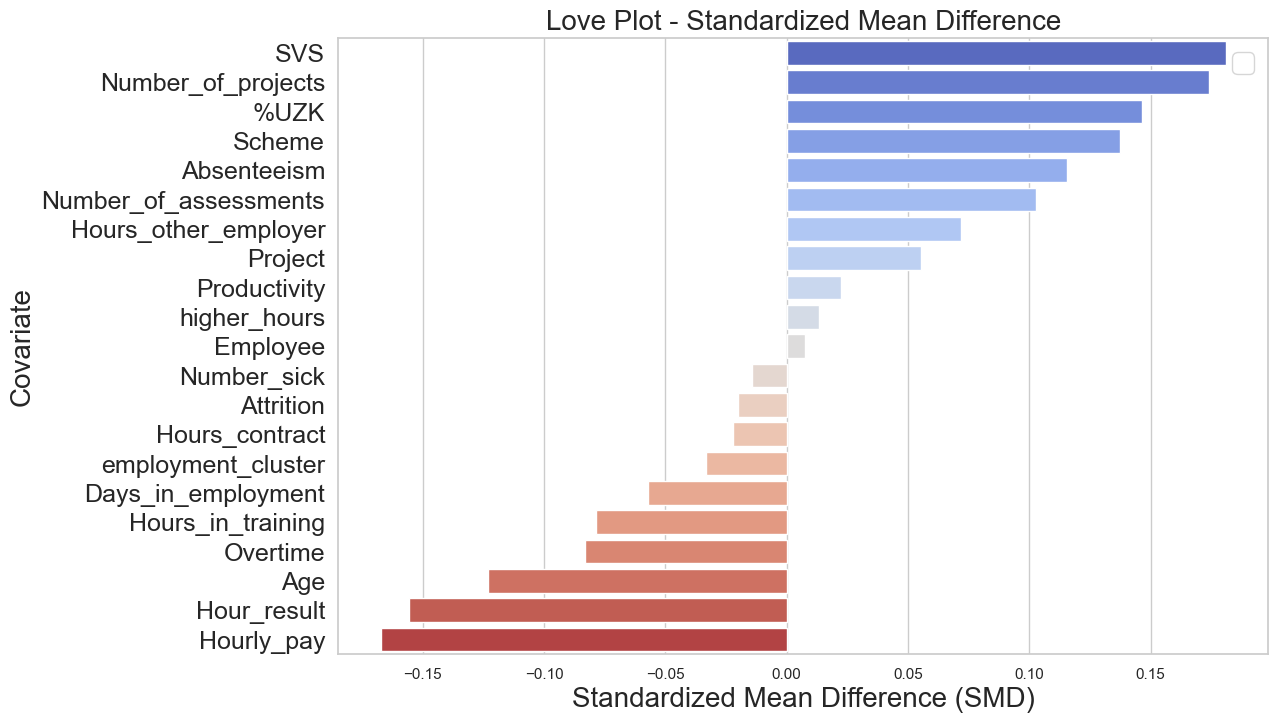

In [835]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='SMD', y='Covariate', data=smd_df, palette='coolwarm')

plt.xlabel('Standardized Mean Difference (SMD)', fontsize=20)
plt.ylabel('Covariate', fontsize=20)
plt.title('Love Plot - Standardized Mean Difference', fontsize=20)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)

plt.show()


In [836]:
smd_df

,Covariate,SMD
11,SVS,0.181062
10,Number_of_projects,0.174112
7,%UZK,0.146528
14,Scheme,0.137446
6,Absenteeism,0.115459
18,Number_of_assessments,0.102775
16,Hours_other_employer,0.071754
2,Project,0.055293
5,Productivity,0.022548
19,higher_hours,0.013277


In [837]:
smd_df.to_excel("smd.xlsx", index=True)

In [838]:
df

Employee     Age  End_date  Employer   Project  \
treatment count      202.00  202.00       0.0     202.0    202.00   
          mean    300732.97   34.87       NaN      98.0  23814.54   
          std     889216.56   13.80       NaN       0.0  28357.48   
          min       6325.00   18.00       NaN      98.0   1000.00   
          25%     217195.00   22.00       NaN      98.0   1790.00   
          50%     217720.50   32.00       NaN      98.0  20033.00   
          75%     218191.00   46.00       NaN      98.0  20180.50   
          max    9207519.00   69.00       NaN      98.0  80144.00   
control   count      229.00  229.00       0.0     229.0    229.00   
          mean    294316.78   36.55       NaN      98.0  22218.42   
          std     830482.48   13.46       NaN       0.0  29350.47   
          min      12862.00   18.00       NaN      98.0   1000.00   
          25%     217229.00   25.00       NaN      98.0   1742.00   
          50%     217820.00   35.00       NaN      98.0   5140.00   
          75%     218219.00   46.00       NaN      98.0  20175.00   
          max    9121460.00   69.00       NaN      98.0  80144.00   

                 Days_in_employment  Hour_result  Productivity  Absenteeism  \
treatment count              202.00       202.00        202.00       202.00   
          mean               136.97         0.14          0.63         0.08   
          std                 54.77         0.24          0.40         0.07   
          min                 64.00        -0.42          0.00         0.00   
          25%                 90.00        -0.01          0.00         0.02   
          50%                133.00         0.11          0.78         0.05   
          75%                177.75         0.29          0.91         0.13   
          max                290.00         0.79          1.27         0.33   
control   count              229.00       229.00        229.00       229.00   
          mean               140.15         0.18          0.62         0.07   
          std                 56.57         0.23          0.41         0.06   
          min                 65.00        -0.34          0.00         0.00   
          25%                 91.00         0.01          0.00         0.02   
          50%                131.00         0.13          0.82         0.05   
          75%                180.00         0.34          0.92         0.10   
          max                299.00         0.65          1.27         0.37   

                    MKS    %UZK  Attrition  Overtime  Number_of_projects  \
treatment count  202.00  202.00     202.00    202.00              202.00   
          mean     7.93    0.10       0.40      1.06                1.75   
          std      2.28    0.17       0.33      4.60                1.10   
          min      0.00    0.00       0.00      0.00                0.00   
          25%      7.83    0.00       0.18      0.00                1.00   
          50%      8.57    0.00       0.33      0.00                1.00   
          75%      8.90    0.14       0.52      0.00                2.00   
          max     10.00    0.83       2.00     41.00                6.00   
control   count  229.00  229.00     229.00    229.00              229.00   
          mean     8.33    0.07       0.41      1.75                1.56   
          std      1.57    0.14       0.33     10.43                1.06   
          min      0.00    0.00       0.00      0.00                0.00   
          25%      8.10    0.00       0.18      0.00                1.00   
          50%      8.70    0.00       0.32      0.00                1.00   
          75%      9.00    0.05       0.53      0.00                2.00   
          max      9.89    0.56       2.00    136.65                7.00   

                    SVS  Number_sick  Hourly_pay  Scheme  Hours_contract  \
treatment count  202.00       202.00      202.00  202.00          202.00   
          mean     0.03         0.21       12.17    0.06

In [839]:
#ANOVA

In [840]:
df_anova = pd.concat([treatment, control], ignore_index=True)

In [841]:
df_anova = df_anova.drop(['End_date', 'Employer', 'Save_hours_D-part', 'count', 'MKS', 'many_hours', 'Project'], axis=1)

In [842]:
df_anova = df_anova.select_dtypes(include=[np.number])

In [843]:
df_anova

,Employee,Age,Days_in_employment,Hour_result,Productivity,Absenteeism,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Hours_other_employer,Hours_in_training,Number_of_assessments,higher_hours,employment_cluster,Treatment
0,6325,67,233,0.356,1.197,0.0558,0.1915,0.316,0.00,1,1,6,13.87,0.00,0,0,0,0,0,6,1
1,8339,42,72,-0.043,0.692,0.1501,0.4911,0.718,5.25,1,1,1,12.15,0.42,0,0,0,0,0,1,1
2,11838,36,239,0.151,0.909,0.1542,0.0000,0.512,0.00,1,1,5,12.15,0.00,0,15,0,1,1,6,1
3,13256,20,170,0.518,0.000,0.1709,0.1881,0.000,0.00,3,0,0,10.94,0.00,0,24,0,0,1,4,1
4,13350,24,72,0.402,0.000,0.0000,0.0000,0.000,0.00,2,0,0,13.87,0.00,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,218607,24,65,0.136,0.635,0.0653,0.1951,0.534,0.00,1,0,3,12.15,0.00,0,0,0,0,0,1,0
427,218609,23,65,0.150,0.821,0.0668,0.0970,0.578,0.00,1,0,0,12.15,0.00,0,17,0,0,1,1,0
428,218664,18,65,0.175,1.041,0.1322,0.0000,0.080,0.00,2,0,0,9.72,0.00,0,0,0,0,0,1,0
429,9121433,56,114,0.167,0.726,0.0179,0.5086,1.444,18.50,1,0,0,14.78,0.00,0,0,0,0,0,2,0


In [844]:
df_anova = df_anova.drop(['Employee', 'Age', 'employment_cluster'], axis=1)

In [845]:
df_anova = df_anova.rename(columns={'%UZK': 'UZK'})

In [846]:
df_anova

,Days_in_employment,Hour_result,Productivity,Absenteeism,UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Hours_contract,Hours_other_employer,Hours_in_training,Number_of_assessments,higher_hours,Treatment
0,233,0.356,1.197,0.0558,0.1915,0.316,0.00,1,1,6,13.87,0.00,0,0,0,0,0,1
1,72,-0.043,0.692,0.1501,0.4911,0.718,5.25,1,1,1,12.15,0.42,0,0,0,0,0,1
2,239,0.151,0.909,0.1542,0.0000,0.512,0.00,1,1,5,12.15,0.00,0,15,0,1,1,1
3,170,0.518,0.000,0.1709,0.1881,0.000,0.00,3,0,0,10.94,0.00,0,24,0,0,1,1
4,72,0.402,0.000,0.0000,0.0000,0.000,0.00,2,0,0,13.87,0.00,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,65,0.136,0.635,0.0653,0.1951,0.534,0.00,1,0,3,12.15,0.00,0,0,0,0,0,0
427,65,0.150,0.821,0.0668,0.0970,0.578,0.00,1,0,0,12.15,0.00,0,17,0,0,1,0
428,65,0.175,1.041,0.1322,0.0000,0.080,0.00,2,0,0,9.72,0.00,0,0,0,0,0,0
429,114,0.167,0.726,0.0179,0.5086,1.444,18.50,1,0,0,14.78,0.00,0,0,0,0,0,0


In [847]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'Treatment ~ Days_in_employment + Hour_result + Productivity + Absenteeism  + Attrition + UZK + Overtime + Number_of_projects + SVS + Number_sick + Hourly_pay + Scheme + Hours_contract + Hours_other_employer + Hours_in_training + Number_of_assessments + higher_hours'

model = ols(formula, data=df_anova).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                           sum_sq     df         F    PR(>F)
Days_in_employment       0.128953    1.0  0.526206  0.468617
Hour_result              1.189570    1.0  4.854165  0.028131
Productivity             0.583141    1.0  2.379568  0.123697
Absenteeism              0.170852    1.0  0.697179  0.404216
Attrition                0.318081    1.0  1.297963  0.255246
UZK                      0.476116    1.0  1.942842  0.164110
Overtime                 0.357599    1.0  1.459220  0.227745
Number_of_projects       0.467945    1.0  1.909498  0.167766
SVS                      0.831393    1.0  3.392589  0.066207
Number_sick              0.073087    1.0  0.298239  0.585283
Hourly_pay               0.877738    1.0  3.581704  0.059118
Scheme                   0.351484    1.0  1.434267  0.231756
Hours_contract           0.044875    1.0  0.183119  0.668929
Hours_other_employer     0.393021    1.0  1.603764  0.206084
Hours_in_training        0.048535    1.0  0.198052  0.656531
Number_of_assessments   

In [732]:
#EXPERIMENT OUTCOMES

In [848]:
treatment = pd.read_excel('experiment_treatment_group.xlsx')
control = pd.read_excel('experiment_control_group.xlsx')

In [849]:
treatment

,Employee,Age,Gender,Nationality,End_date,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1
3,13256,20,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,1702,Kantoren & Vastgoed,170,0.518,0.000,0.1709,9.35,0.1881,0.000,0.00,3,0,0,10.94,0.00,8 maanden,0,Ja,24,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,1,0,4,1
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,218611,22,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,3084,Kantoren & Vastgoed,65,0.548,0.000,0.0000,9.70,0.0000,0.400,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1
198,218632,26,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,1742,Hotels,64,-0.018,0.857,0.0478,8.57,0.0000,0.304,0.00,2,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1
199,218644,55,Man,Ghanese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,65,0.495,0.000,0.0111,8.03,0.0000,0.122,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,X,1,0,0,1,1
200,9122301,51,Vrouw,others,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,20182,Hotels,156,-0.071,0.773,0.0018,0.00,0.0000,0.500,0.00,2,0,2,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,1


In [850]:
control

,Employee,Age,Gender,Nationality,End_date,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment
0,12862,50,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1840,Hotels,65,0.041,0.870,0.0747,9.53,0.0000,0.211,0.00,3,0,0,13.05,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,1,0
1,200808,40,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker,Regio ZON,5122,Leisure,203,0.539,0.000,0.0000,9.80,0.0000,0.311,0.00,2,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,N,0,Millennials,1,0,0,5,0
2,202742,50,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1721,Zorg,156,0.212,0.985,0.0580,9.48,0.0000,0.133,0.00,1,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,0
3,209743,46,Man,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1841,Hotels,111,0.067,0.885,0.0335,8.67,0.4301,0.375,0.00,1,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0
4,211951,26,Vrouw,Hongaarse,NaN,98,Supervisor (2.1b),Regio Amsterdam,1906,Hotels,179,-0.310,0.751,0.0299,7.63,0.5566,0.737,136.65,1,0,0,15.28,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0
225,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.0,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0
226,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.0,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0
227,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0


In [851]:
data = pd.read_excel('experiment_outcome.xlsx')

In [852]:
data

,Medewerker,Leeftijd,Geslacht,Nationaliteit,Datum_in_dienst,Datum_uit_dienst,Jaar uit dienst,Werkgever,pso,Functie_omschrijving,Type_functie_omschrijving,Regio,Rayon,Project,Segment,reden_einde_dienstverband,Branchedatum,Dagen in dienst,Branche jaren,Urenresultaat,Productiviteit,Verzuim,MKS,%UZK,Verloop,Overuren,Aantal projecten,SVS,Aantal ziek,Uurloon,Regeling,Contract,Uren/wk,Min. uren/wk,Max. uren/wk,Andere werkgever,Uren p/w andere werkgever,Volg je een opleiding,Uren p/w opleiding,Spaaruren D-deel,Reden indiensttreding,Traject MDP,VAST-VAR uren,Introductie afgerond,Aantal beoordelingen
0,37,55,Vrouw,Nederlandse,1995-10-02,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,1995-10-02,10110.0,27.698630,0.423,0.000,0.0161,8.03,0.0000,0.120,0.0,1,0,1,14.58,0,Onbepaalde tijd,30.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,0
1,38,58,Vrouw,Nederlandse,1999-03-27,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,1999-03-27,8838.0,24.213699,0.423,0.000,0.0161,8.03,0.0000,0.120,0.0,1,0,0,13.87,0,Onbepaalde tijd,10.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,0
2,40,45,Vrouw,Nederlandse,2001-08-21,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,2001-08-21,7960.0,21.808219,0.423,0.000,0.0161,8.03,0.0000,0.120,0.0,1,0,0,13.87,0,Onbepaalde tijd,25.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,0
3,46,54,Vrouw,Nederlandse,2000-01-03,NaT,NaN,98,NaN,Housekeeper (3.1),Loonschaal 5,Regio Amsterdam,Rayon 105,13002,Hotels,NaN,2000-01-03,8556.0,23.441096,-0.102,0.693,0.0465,8.75,0.3754,0.612,2.0,3,1,3,16.64,0,Onbepaalde tijd,38.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,1
4,49,64,Vrouw,Nederlandse,2000-08-09,NaT,NaN,98,NaN,Schoonmaakmedewerker Hotel,Loonschaal 1,Regio Amsterdam,Rayon 100,1000,Hotels,NaN,2000-08-09,8337.0,22.841096,0.026,0.622,0.0678,7.71,0.2176,0.721,0.0,1,0,4,13.87,0,Onbepaalde tijd,25.0,0.0,0.0,Nee,0.0,Nee,0.0,1.0,0,N,Vast,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10564,9207678,34,Vrouw,Roemeense,2020-02-10,2020-09-10,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 499,80037,Hotels,Einde van rechtswege,2020-02-10,NaN,NaN,-0.347,0.000,0.0794,0.00,0.0000,0.000,0.0,1,0,0,11.27,0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0.0,Via Hotel Cleaning Company,N,Variabel,N,0
10565,9207679,49,Vrouw,Egyptische,2021-09-29,NaT,NaN,98,N.v.t.,Schoonmaakmedewerker Hotel,Loonschaal 1,Regio Zuid-West,Rayon 402,80135,Hotels,NaN,2021-09-29,NaN,NaN,0.083,1.071,0.1549,9.80,0.0000,0.140,0.0,1,0,0,12.58,0,Onbepaalde tijd,9.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,Her indienst,N,Vast,N,0
10566,9207685,55,Vrouw,Portugese,2020-02-10,2020-09-10,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 406,80058,Hotels,Einde van rechtswege,2020-02-10,NaN,NaN,0.377,0.912,0.0144,0.00,0.0000,0.000,0.0,3,0,0,11.27,0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0.0,Via Hotel Cleaning Company,N,Variabel,N,0
10567,9207692,28,Man,Nederlandse,2020-02-15,2020-07-31,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 406,80023,Hotels,EV - Andere baan,2020-02-15,NaN,NaN,0.100,0.842,0.0290,0.00,0.0000,8.000,0.0,1,0,0,11.27,0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0.0,Via Hotel Cleaning Company,N,Variabel,N,0


In [853]:
data = data.rename(columns={'Medewerker':'Employee', 'Leeftijd':'Age', 'Geslacht': 'Gender', 'Nationaliteit':'Nationality',
       'Datum_in_dienst':'Start_date', 'Datum_uit_dienst':'End_date', 'Werkgever':'Employer',
       'Functie_omschrijving':'Job_description', 'Regio':'Region', 
       'reden_einde_dienstverband':'reason_end_employment', 'Branchedatum':'Industry_date', 'Dagen in dienst':'Days_in_employment',
       'Urenresultaat':'Hour_result', 'Productiviteit':'Productivity', 'Verzuim':'Absenteeism', 'Verloop':'Attrition',
       'Overuren':'Overtime', 'Aantal projecten':'Number_of_projects', 'Aantal ziek':'Number_sick', 'Uurloon':'Hourly_pay',
       'Regeling':'Scheme',  'Uren/wk':'Hours_contract', 'Andere werkgever':'Another_employer',
       'Uren p/w andere werkgever':'Hours_other_employer', 'Volg je een opleiding':'Training', 'Uren p/w opleiding':'Hours_in_training',
       'Spaaruren D-deel':'Save_hours_D-part', 'Reden indiensttreding':'Reason_for_joining', 'Traject MDP':'Pathway MDP',
       'VAST-VAR uren':'VAST-VAR hours', 'Introductie afgerond':'Introduction completed', 'Aantal beoordelingen': 'Number_of_assessments'})

In [854]:
data

,Employee,Age,Gender,Nationality,Start_date,End_date,Jaar uit dienst,Employer,pso,Job_description,Type_functie_omschrijving,Region,Rayon,Project,Segment,reason_end_employment,Industry_date,Days_in_employment,Branche jaren,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Min. uren/wk,Max. uren/wk,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments
0,37,55,Vrouw,Nederlandse,1995-10-02,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,1995-10-02,10110.0,27.698630,0.423,0.000,0.0161,8.03,0.0000,0.120,0.0,1,0,1,14.58,0,Onbepaalde tijd,30.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,0
1,38,58,Vrouw,Nederlandse,1999-03-27,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,1999-03-27,8838.0,24.213699,0.423,0.000,0.0161,8.03,0.0000,0.120,0.0,1,0,0,13.87,0,Onbepaalde tijd,10.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,0
2,40,45,Vrouw,Nederlandse,2001-08-21,NaT,NaN,98,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Amsterdam,Rayon 106,1276,Leisure,NaN,2001-08-21,7960.0,21.808219,0.423,0.000,0.0161,8.03,0.0000,0.120,0.0,1,0,0,13.87,0,Onbepaalde tijd,25.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,0
3,46,54,Vrouw,Nederlandse,2000-01-03,NaT,NaN,98,NaN,Housekeeper (3.1),Loonschaal 5,Regio Amsterdam,Rayon 105,13002,Hotels,NaN,2000-01-03,8556.0,23.441096,-0.102,0.693,0.0465,8.75,0.3754,0.612,2.0,3,1,3,16.64,0,Onbepaalde tijd,38.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,0,N,Vast,N,1
4,49,64,Vrouw,Nederlandse,2000-08-09,NaT,NaN,98,NaN,Schoonmaakmedewerker Hotel,Loonschaal 1,Regio Amsterdam,Rayon 100,1000,Hotels,NaN,2000-08-09,8337.0,22.841096,0.026,0.622,0.0678,7.71,0.2176,0.721,0.0,1,0,4,13.87,0,Onbepaalde tijd,25.0,0.0,0.0,Nee,0.0,Nee,0.0,1.0,0,N,Vast,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10564,9207678,34,Vrouw,Roemeense,2020-02-10,2020-09-10,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 499,80037,Hotels,Einde van rechtswege,2020-02-10,NaN,NaN,-0.347,0.000,0.0794,0.00,0.0000,0.000,0.0,1,0,0,11.27,0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0.0,Via Hotel Cleaning Company,N,Variabel,N,0
10565,9207679,49,Vrouw,Egyptische,2021-09-29,NaT,NaN,98,N.v.t.,Schoonmaakmedewerker Hotel,Loonschaal 1,Regio Zuid-West,Rayon 402,80135,Hotels,NaN,2021-09-29,NaN,NaN,0.083,1.071,0.1549,9.80,0.0000,0.140,0.0,1,0,0,12.58,0,Onbepaalde tijd,9.0,0.0,0.0,Nee,0.0,Nee,0.0,0.0,Her indienst,N,Vast,N,0
10566,9207685,55,Vrouw,Portugese,2020-02-10,2020-09-10,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 406,80058,Hotels,Einde van rechtswege,2020-02-10,NaN,NaN,0.377,0.912,0.0144,0.00,0.0000,0.000,0.0,3,0,0,11.27,0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0.0,Via Hotel Cleaning Company,N,Variabel,N,0
10567,9207692,28,Man,Nederlandse,2020-02-15,2020-07-31,2020.0,92,NaN,Schoonmaakmedewerker,Loonschaal 1,Regio Zuid-West,Rayon 406,80023,Hotels,EV - Andere baan,2020-02-15,NaN,NaN,0.100,0.842,0.0290,0.00,0.0000,8.000,0.0,1,0,0,11.27,0,Bepaalde tijd,0.0,2.0,38.0,Nee,0.0,Nee,0.0,0.0,Via Hotel Cleaning Company,N,Variabel,N,0


In [855]:
treatment = pd.merge(treatment, data[['Employee', 'End_date']], on='Employee', how='left')
control = pd.merge(control, data[['Employee', 'End_date']], on='Employee', how='left')

In [856]:
treatment

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1,NaT
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1,NaT
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1,NaT
3,13256,20,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,1702,Kantoren & Vastgoed,170,0.518,0.000,0.1709,9.35,0.1881,0.000,0.00,3,0,0,10.94,0.00,8 maanden,0,Ja,24,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,1,0,4,1,NaT
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,218611,22,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,3084,Kantoren & Vastgoed,65,0.548,0.000,0.0000,9.70,0.0000,0.400,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1,2023-07-07
198,218632,26,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,1742,Hotels,64,-0.018,0.857,0.0478,8.57,0.0000,0.304,0.00,2,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1,NaT
199,218644,55,Man,Ghanese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,65,0.495,0.000,0.0111,8.03,0.0000,0.122,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,X,1,0,0,1,1,NaT
200,9122301,51,Vrouw,others,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,20182,Hotels,156,-0.071,0.773,0.0018,0.00,0.0000,0.500,0.00,2,0,2,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,1,NaT


In [857]:
control

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y
0,12862,50,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1840,Hotels,65,0.041,0.870,0.0747,9.53,0.0000,0.211,0.00,3,0,0,13.05,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,1,0,NaT
1,200808,40,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker,Regio ZON,5122,Leisure,203,0.539,0.000,0.0000,9.80,0.0000,0.311,0.00,2,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,N,0,Millennials,1,0,0,5,0,2023-05-11
2,202742,50,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1721,Zorg,156,0.212,0.985,0.0580,9.48,0.0000,0.133,0.00,1,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,0,NaT
3,209743,46,Man,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1841,Hotels,111,0.067,0.885,0.0335,8.67,0.4301,0.375,0.00,1,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT
4,211951,26,Vrouw,Hongaarse,NaN,98,Supervisor (2.1b),Regio Amsterdam,1906,Hotels,179,-0.310,0.751,0.0299,7.63,0.5566,0.737,136.65,1,0,0,15.28,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,0,0,4,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,2023-05-03
225,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.0,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0,NaT
226,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.0,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,NaT
227,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT


In [858]:
treatment['Before'] = treatment['End_date_x'].apply(lambda x: 1 if pd.notnull(x) else 0)
control['Before'] = control['End_date_x'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [859]:
treatment['After'] = treatment['End_date_y'].apply(lambda x: 1 if pd.notnull(x) else 0)
control['After'] = control['End_date_y'].apply(lambda x: 1 if pd.notnull(x) else 0)

In [860]:
non_turnover_treatment = 1 - treatment[treatment['After'] == 1 ]['After'].count() / treatment['Before'].count()

non_turnover_control = 1 - control[control['After'] == 1 ]['After'].count() / control['Before'].count()

treatment_effect = non_turnover_treatment - non_turnover_control

print("Treatment Effect: {:.2%}".format(treatment_effect))

Treatment Effect: -0.94%


In [861]:
turnover_control

0.1346153846153846

In [862]:
turnover_treatment

0.07692307692307693

In [863]:
experiment_group = pd.concat([treatment, control], ignore_index=True)

In [864]:
experiment_group

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y,Before,After
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1,NaT,0,0
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1,NaT,0,0
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1,NaT,0,0
3,13256,20,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,1702,Kantoren & Vastgoed,170,0.518,0.000,0.1709,9.35,0.1881,0.000,0.00,3,0,0,10.94,0.00,8 maanden,0,Ja,24,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,1,0,4,1,NaT,0,0
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1,NaT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,2023-05-03,0,1
427,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.00,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0,NaT,0,0
428,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,NaT,0,0
429,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT,0,0


In [865]:
clusters = experiment_group['employment_cluster'].unique()
treatment_effects = []

for cluster in clusters:
    turnover_treatment = experiment_group.loc[experiment_group['Treatment'] == 1, 'After'].mean()
    turnover_control = experiment_group.loc[experiment_group['Treatment'] == 0, 'After'].mean()
    
    treatment_effect = turnover_treatment - turnover_control
    treatment_effects.append(treatment_effect)

for i, cluster in enumerate(clusters):
    print("Treatment Effect for Cluster {}: {:.2}".format(cluster, treatment_effects[i]))

Treatment Effect for Cluster 6: 0.0094
Treatment Effect for Cluster 1: 0.0094
Treatment Effect for Cluster 4: 0.0094
Treatment Effect for Cluster 7: 0.0094
Treatment Effect for Cluster 2: 0.0094
Treatment Effect for Cluster 3: 0.0094
Treatment Effect for Cluster 8: 0.0094
Treatment Effect for Cluster 5: 0.0094


In [866]:
turnover_treatment - turnover_control

0.009360543041203678

In [867]:
#inverse propensity score matching- conduct additional weight assignment 

In [868]:
response = pd.read_excel('response.xlsx') #dataset with response from employees

In [870]:
response = response.rename(columns={'Medewerker':'Employee'})

In [871]:
response

,Employee,Response,Questions answered
0,6325,Yes,Yes
1,8339,Yes,Yes
2,11838,Yes,No
3,13256,No,No
4,13350,Yes,Yes
...,...,...,...
197,218611,No,No
198,218632,Yes,Yes
199,218644,Yes,Yes
200,9122301,Yes,No


In [872]:
treatment = pd.merge(treatment, response[['Employee', 'Response']], on='Employee', how='left')

In [873]:
treatment

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y,Before,After,Response
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1,NaT,0,0,Yes
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1,NaT,0,0,Yes
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1,NaT,0,0,Yes
3,13256,20,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,1702,Kantoren & Vastgoed,170,0.518,0.000,0.1709,9.35,0.1881,0.000,0.00,3,0,0,10.94,0.00,8 maanden,0,Ja,24,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,1,0,4,1,NaT,0,0,No
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1,NaT,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,218611,22,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio ZON,3084,Kantoren & Vastgoed,65,0.548,0.000,0.0000,9.70,0.0000,0.400,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1,2023-07-07,0,1,No
198,218632,26,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,1742,Hotels,64,-0.018,0.857,0.0478,8.57,0.0000,0.304,0.00,2,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1,NaT,0,0,Yes
199,218644,55,Man,Ghanese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,65,0.495,0.000,0.0111,8.03,0.0000,0.122,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,X,1,0,0,1,1,NaT,0,0,Yes
200,9122301,51,Vrouw,others,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,20182,Hotels,156,-0.071,0.773,0.0018,0.00,0.0000,0.500,0.00,2,0,2,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,1,NaT,0,0,Yes


In [874]:
treatment_responded = treatment[treatment['Response'] == 'Yes'] #keeping only responded

In [875]:
print(treatment_responded.columns)

Index(['Employee', 'Age', 'Gender', 'Nationality', 'End_date_x', 'Employer',
       'Job_description', 'Region', 'Project', 'Segment', 'Days_in_employment',
       'Hour_result', 'Productivity', 'Absenteeism', 'MKS', '%UZK',
       'Attrition', 'Overtime', 'Number_of_projects', 'SVS', 'Number_sick',
       'Hourly_pay', 'Scheme', 'Contract', 'Hours_contract',
       'Another_employer', 'Hours_other_employer', 'Training',
       'Hours_in_training', 'Save_hours_D-part', 'Reason_for_joining',
       'Pathway MDP', 'VAST-VAR hours', 'Introduction completed',
       'Number_of_assessments', 'Generation', 'count', 'higher_hours',
       'many_hours', 'employment_cluster', 'Treatment', 'End_date_y', 'Before',
       'After', 'Response'],
      dtype='object')


In [876]:
treatment_responded

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y,Before,After,Response
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1,NaT,0,0,Yes
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1,NaT,0,0,Yes
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1,NaT,0,0,Yes
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1,NaT,0,0,Yes
6,200449,32,Vrouw,Portugese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1810,Kantoren & Vastgoed,267,0.475,0.000,0.1211,7.90,0.0000,0.333,0.00,2,0,0,12.15,1.26,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,7,1,NaT,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,218591,23,Man,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1906,Hotels,68,-0.310,0.751,0.0299,7.63,0.5566,0.737,0.00,1,0,0,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1,NaT,0,0,Yes
198,218632,26,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Zuid-West,1742,Hotels,64,-0.018,0.857,0.0478,8.57,0.0000,0.304,0.00,2,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,1,NaT,0,0,Yes
199,218644,55,Man,Ghanese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1276,Leisure,65,0.495,0.000,0.0111,8.03,0.0000,0.122,0.00,1,0,0,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,X,1,0,0,1,1,NaT,0,0,Yes
200,9122301,51,Vrouw,others,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,20182,Hotels,156,-0.071,0.773,0.0018,0.00,0.0000,0.500,0.00,2,0,2,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,1,NaT,0,0,Yes


In [877]:
control

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y,Before,After
0,12862,50,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1840,Hotels,65,0.041,0.870,0.0747,9.53,0.0000,0.211,0.00,3,0,0,13.05,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,1,0,NaT,0,0
1,200808,40,Vrouw,Bulgaarse,NaN,98,Schoonmaakmedewerker,Regio ZON,5122,Leisure,203,0.539,0.000,0.0000,9.80,0.0000,0.311,0.00,2,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,N,0,Millennials,1,0,0,5,0,2023-05-11,0,1
2,202742,50,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1721,Zorg,156,0.212,0.985,0.0580,9.48,0.0000,0.133,0.00,1,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,4,0,NaT,0,0
3,209743,46,Man,Bulgaarse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1841,Hotels,111,0.067,0.885,0.0335,8.67,0.4301,0.375,0.00,1,0,0,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT,0,0
4,211951,26,Vrouw,Hongaarse,NaN,98,Supervisor (2.1b),Regio Amsterdam,1906,Hotels,179,-0.310,0.751,0.0299,7.63,0.5566,0.737,136.65,1,0,0,15.28,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Z,1,0,0,4,0,NaT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.0,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,2023-05-03,0,1
225,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.0,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0,NaT,0,0
226,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.0,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,NaT,0,0
227,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.0,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT,0,0


In [878]:
treatment_responded = treatment_responded.drop("Response", axis=1)

In [879]:
combined_group = pd.concat([treatment_responded, control])

In [880]:
combined_group

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y,Before,After
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1,NaT,0,0
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1,NaT,0,0
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1,NaT,0,0
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1,NaT,0,0
6,200449,32,Vrouw,Portugese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1810,Kantoren & Vastgoed,267,0.475,0.000,0.1211,7.90,0.0000,0.333,0.00,2,0,0,12.15,1.26,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,7,1,NaT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,2023-05-03,0,1
225,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.00,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0,NaT,0,0
226,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,NaT,0,0
227,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT,0,0


In [881]:
clusters = combined_group['employment_cluster'].unique()
treatment_effects = []

for cluster in clusters:
    turnover_treatment = combined_group.loc[combined_group['Treatment'] == 1, 'After'].mean()
    turnover_control = combined_group.loc[combined_group['Treatment'] == 0, 'After'].mean()
    
    treatment_effect = turnover_treatment - turnover_control
    treatment_effects.append(treatment_effect)

for i, cluster in enumerate(clusters):
    print("Treatment Effect for Cluster {}: {:.4}".format(cluster, treatment_effects[i]))

Treatment Effect for Cluster 6: 0.02073
Treatment Effect for Cluster 1: 0.02073
Treatment Effect for Cluster 7: 0.02073
Treatment Effect for Cluster 2: 0.02073
Treatment Effect for Cluster 3: 0.02073
Treatment Effect for Cluster 4: 0.02073
Treatment Effect for Cluster 8: 0.02073
Treatment Effect for Cluster 5: 0.02073


In [882]:
combined_group

,Employee,Age,Gender,Nationality,End_date_x,Employer,Job_description,Region,Project,Segment,Days_in_employment,Hour_result,Productivity,Absenteeism,MKS,%UZK,Attrition,Overtime,Number_of_projects,SVS,Number_sick,Hourly_pay,Scheme,Contract,Hours_contract,Another_employer,Hours_other_employer,Training,Hours_in_training,Save_hours_D-part,Reason_for_joining,Pathway MDP,VAST-VAR hours,Introduction completed,Number_of_assessments,Generation,count,higher_hours,many_hours,employment_cluster,Treatment,End_date_y,Before,After
0,6325,67,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio Midden-West,1368,Hotels,233,0.356,1.197,0.0558,9.10,0.1915,0.316,0.00,1,1,6,13.87,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,6,1,NaT,0,0
1,8339,42,Vrouw,Poolse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1156,Hotels,72,-0.043,0.692,0.1501,9.83,0.4911,0.718,5.25,1,1,1,12.15,0.42,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,1,1,NaT,0,0
2,11838,36,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,13006,Hotels,239,0.151,0.909,0.1542,8.80,0.0000,0.512,0.00,1,1,5,12.15,0.00,8 maanden,0,Ja,15,Nee,0,0,Her indienst,N,Variabel,N,1,Millennials,1,1,0,6,1,NaT,0,0
4,13350,24,Man,Nederlandse,NaN,98,Schoonmaakmedewerker,Regio Midden-West,1831,Zorg,72,0.402,0.000,0.0000,8.50,0.0000,0.000,0.00,2,0,0,13.87,0.00,8 maanden,0,Nee,0,Ja,0,0,Her indienst,N,Variabel,N,0,Z,1,0,0,1,1,NaT,0,0
6,200449,32,Vrouw,Portugese,NaN,98,Schoonmaakmedewerker,Regio Amsterdam,1810,Kantoren & Vastgoed,267,0.475,0.000,0.1211,7.90,0.0000,0.333,0.00,2,0,0,12.15,1.26,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,Millennials,1,0,0,7,1,NaT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,218607,24,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio Amsterdam,1000,Hotels,65,0.136,0.635,0.0653,7.47,0.1951,0.534,0.00,1,0,3,12.15,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,2023-05-03,0,1
225,218609,23,Vrouw,Spaanse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1126,Hotels,65,0.150,0.821,0.0668,8.98,0.0970,0.578,0.00,1,0,0,12.15,0.00,8 maanden,0,Ja,17,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,1,0,1,0,NaT,0,0
226,218664,18,Vrouw,Nederlandse,NaN,98,Schoonmaakmedewerker Hotel,Regio ZON,1932,Hotels,65,0.175,1.041,0.1322,8.73,0.0000,0.080,0.00,2,0,0,9.72,0.00,8 maanden,0,Nee,0,Nee,0,0,Via eigen aanname EW,N,Variabel,J,0,Z,1,0,0,1,0,NaT,0,0
227,9121433,56,Vrouw,Portugese,NaN,98,Supervisor (2.1b),Regio ZON,20181,Hotels,114,0.167,0.726,0.0179,7.83,0.5086,1.444,18.50,1,0,0,14.78,0.00,8 maanden,0,Nee,0,Nee,0,0,Her indienst,N,Variabel,J,0,X,1,0,0,2,0,NaT,0,0


In [883]:
treatment_1_count = len(combined_group[combined_group['Treatment'] == 1])

treatment_0_count = len(combined_group[combined_group['Treatment'] == 0])

print("Number of records with Treatment = 1:", treatment_1_count)
print("Number of records with Treatment = 0:", treatment_0_count)

Number of records with Treatment = 1: 91
Number of records with Treatment = 0: 229


In [608]:
print(X.dtypes)

Gender                     object
Nationality                object
Employer                    int64
Job_description            object
Region                     object
Project                     int64
Segment                    object
Hour_result               float64
Productivity              float64
Absenteeism               float64
MKS                       float64
%UZK                      float64
Attrition                 float64
Overtime                  float64
Number_of_projects          int64
SVS                         int64
Number_sick                 int64
Hourly_pay                float64
Scheme                    float64
Contract                   object
Hours_contract              int64
Another_employer           object
Hours_other_employer        int64
Training                   object
Hours_in_training           int64
Reason_for_joining         object
Pathway MDP                object
VAST-VAR hours             object
Introduction completed     object
Number_of_asse

In [889]:
X = combined_group.drop(['Contract',"Treatment", 'End_date_x', 'Employee', 'Save_hours_D-part', 'count', 'End_date_y'], axis=1)
categorical_cols = ['Gender', 'Nationality', 'Employer', 'Job_description', 'Region', 'Segment', 'SVS', 'Scheme',  'Another_employer', 'Training',
                    'Reason_for_joining', 'Pathway MDP', 'VAST-VAR hours', 'Introduction completed', 'Generation']
numerical_cols = ['Days_in_employment', 'Age', 'Hour_result', 'Productivity', 'Absenteeism', 'MKS', '%UZK',
                  'Attrition', 'Overtime', 'Number_of_projects', 'Number_sick', 'Hourly_pay', 'Hours_contract', 'Hours_other_employer', 'Hours_in_training',
                  'Number_of_assessments', 'higher_hours', 'many_hours', 'employment_cluster', 'Before', 'After','Project']
#converting categorical columns to 'category' data type
for col in categorical_cols:
    X[col] = X[col].astype('category')


In [937]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = ct.fit_transform(X)

y = combined_group['Treatment']


logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_encoded, y)

propensity_scores = logreg.predict_proba(X_encoded)[:, 1]
combined_group['propensity_score'] = propensity_scores

ips = 1 / propensity_scores

C:\Users\MagdalenaKonstanty\anaconda3\lib\site-packages\sksurv\column.py:142: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in table.iteritems():
dropped categorical variable 'Employer', because it has only 1 values


In [945]:
from sklearn.neighbors import NearestNeighbors

treatment_df = combined_group[combined_group['Treatment'] == 1]
control_df = combined_group[combined_group['Treatment'] == 0]

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_df['propensity_score'].values.reshape(-1, 1))
distances, indices = nn.kneighbors(treatment_df['propensity_score'].values.reshape(-1, 1))
matched_control_df = control_df.iloc[indices.flatten()]

matched_df = pd.concat([treatment_df, matched_control_df], axis=0)

In [947]:
clusters = matched_df['employment_cluster'].unique()
ate_dict = {}

for cluster in clusters:
    cluster_data = matched_df[matched_df['employment_cluster'] == cluster]
    
    treated_employees = cluster_data[cluster_data['Treatment'] == 1]
    control_employees = cluster_data[cluster_data['Treatment'] == 0]
    
    ate = np.mean(treated_employees['After']) - np.mean(control_employees['After'])
    ate_dict[cluster] = ate
    
    print(f"Cluster: {cluster}")
    print("Turnover rate for treatment group:")
    print(np.mean(treated_employees['After']))
    print("Turnover rate for control group:")
    print(np.mean(control_employees['After']))

# Print the ATE dictionary
print("ATE for each cluster:")
for cluster, ate in ate_dict.items():
    print(f"Cluster {cluster}: {ate}")

Cluster: 6
Turnover rate for treatment group:
0.0
Turnover rate for control group:
0.14285714285714285
Cluster: 1
Turnover rate for treatment group:
0.2222222222222222
Turnover rate for control group:
0.15151515151515152
Cluster: 7
Turnover rate for treatment group:
0.0
Turnover rate for control group:
0.0
Cluster: 2
Turnover rate for treatment group:
0.05555555555555555
Turnover rate for control group:
0.38461538461538464
Cluster: 3
Turnover rate for treatment group:
0.21428571428571427
Turnover rate for control group:
0.09090909090909091
Cluster: 4
Turnover rate for treatment group:
0.15384615384615385
Turnover rate for control group:
0.35714285714285715
Cluster: 8
Turnover rate for treatment group:
0.0
Turnover rate for control group:
0.0
Cluster: 5
Turnover rate for treatment group:
0.23076923076923078
Turnover rate for control group:
0.3333333333333333
ATE for each cluster:
Cluster 6: -0.14285714285714285
Cluster 1: 0.07070707070707069
Cluster 7: 0.0
Cluster 2: -0.3290598290598291

In [901]:
ate

-0.06652806652806653

In [948]:
from scipy import stats

clusters = matched_df['employment_cluster'].unique()
ate_dict = {}

for cluster in clusters:
    cluster_data = matched_df[matched_df['employment_cluster'] == cluster]
    
    treated_employees = cluster_data[cluster_data['Treatment'] == 1]
    control_employees = cluster_data[cluster_data['Treatment'] == 0]
    
    ate = np.mean(treated_employees['After']) - np.mean(control_employees['After'])
    ate_dict[cluster] = ate
    
    print(f"Cluster: {cluster}")
    print("Turnover rate for treatment group:")
    print(np.mean(treated_employees['After']))
    print("Turnover rate for control group:")
    print(np.mean(control_employees['After']))
    print(f"ATE for cluster {cluster}: {ate}")
    
    t_statistic, p_value = stats.ttest_ind(treated_employees['After'], control_employees['After'])
    print("p-value:", p_value)

    # Check statistical significance
    if p_value < 0.05:
        print("The difference in turnover rates is statistically significant.")
    else:
        print("The difference in turnover rates is not statistically significant.")
    print()

# Print the ATE dictionary
print("ATE for each cluster:")
for cluster, ate in ate_dict.items():
    print(f"Cluster {cluster}: {ate}")


Cluster: 6
Turnover rate for treatment group:
0.0
Turnover rate for control group:
0.14285714285714285
ATE for cluster 6: -0.14285714285714285
p-value: 0.5447373008044911
The difference in turnover rates is not statistically significant.

Cluster: 1
Turnover rate for treatment group:
0.2222222222222222
Turnover rate for control group:
0.15151515151515152
ATE for cluster 1: 0.07070707070707069
p-value: 0.4896924052518129
The difference in turnover rates is not statistically significant.

Cluster: 7
Turnover rate for treatment group:
0.0
Turnover rate for control group:
0.0
ATE for cluster 7: 0.0
p-value: nan
The difference in turnover rates is not statistically significant.

Cluster: 2
Turnover rate for treatment group:
0.05555555555555555
Turnover rate for control group:
0.38461538461538464
ATE for cluster 2: -0.3290598290598291
p-value: 0.021627842022614863
The difference in turnover rates is statistically significant.

Cluster: 3
Turnover rate for treatment group:
0.21428571428571427

C:\Users\MagdalenaKonstanty\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\MagdalenaKonstanty\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1253: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [910]:
clusters = combined_group['employment_cluster'].unique()

for cluster in clusters:
    cluster_data = combined_group[combined_group['employment_cluster'] == cluster]
    
    contingency_table = pd.crosstab(cluster_data['Treatment'], cluster_data['After'])
    
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Cluster: {cluster}")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print()


Cluster: 6
Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[7.27272727 0.72727273]
 [2.72727273 0.27272727]]

Cluster: 1
Chi-square statistic: 0.6714131272166988
P-value: 0.41255936004879934
Degrees of freedom: 1
Expected frequencies:
[[47.22891566  8.77108434]
 [22.77108434  4.22891566]]

Cluster: 7
Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[4.5 1.5]
 [1.5 0.5]]

Cluster: 2
Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
[[42.40625  3.59375]
 [16.59375  1.40625]]

Cluster: 3
Chi-square statistic: 0.037930545781531
P-value: 0.8455826706267361
Degrees of freedom: 1
Expected frequencies:
[[24.27906977  4.72093023]
 [11.72093023  2.27906977]]

Cluster: 4
Chi-square statistic: 0.0008132160392798795
P-value: 0.9772498549476043
Degrees of freedom: 1
Expected frequencies:
[[35.47169811  4.52830189]
 [11.52830189  1.47169811]]

Cluster: 8
Chi-square statistic: 0.0
P-value: 1.0
Degre

In [911]:
for cluster in clusters:
    cluster_data = combined_group[combined_group['employment_cluster'] == cluster]
    treated_employees = cluster_data[cluster_data['Treatment'] == 1]['After']
    control_employees = cluster_data[cluster_data['Treatment'] == 0]['After']
    
    f_value, p_value = stats.f_oneway(treated_employees, control_employees)
    
    print("Cluster:", cluster)
    print("F-value:", f_value)
    print("P-value:", p_value)
    print()

Cluster: 6
F-value: 0.3506493506493506
P-value: 0.5683217589713183

Cluster: 1
F-value: 1.292412894822533
P-value: 0.25895580787972966

Cluster: 7
F-value: 0.75
P-value: 0.41975308641975295

Cluster: 2
F-value: 0.17206384655806622
P-value: 0.6797159219191913

Cluster: 3
F-value: 0.38875788102732084
P-value: 0.536406548138996

Cluster: 4
F-value: 0.27413339183852586
P-value: 0.6028402628119931

Cluster: 8
F-value: nan
P-value: nan

Cluster: 5
F-value: 0.20361226180613087
P-value: 0.6538528967526783



C:\Users\MagdalenaKonstanty\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:3906: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
